<a href="https://colab.research.google.com/github/Al3927/Road-Traffic-Statistics-UK-Data-Analytics-Project/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><font size ="9"> ĐỒ ÁN MÔN HỌC CUỐI KÌ</font></center>
 <br />
 
__TÊN MÔN HỌC:__ PHÂN TÍCH DỮ LIỆU THÔNG MINH

__ĐỀ TÀI:__ PHÂN TÍCH DỮ LIỆU TAI NẠN ĐƯỜNG BỘ TẠI CÁC VÙNG CỦA NƯỚC ANH

__GIẢNG VIÊN HƯỚNG DẪN:__ DƯƠNG NGUYỄN THÁI BẢO
 
__THỨ TỰ NHÓM:__ 07
 
__THÀNH VIÊN:__

- 18120655 Phạm Minh Vương 
- 18120568 Phạm Văn Thật 
- 18120184 Nguyễn Nguyên Khang 
- 1712431 Bùi Lê Hiếu 
- 1712072 Nguyễn Văn Khoa

__PHÂN CÔNG:__

Công việc | Thực hiện | Mức độ hoàn thành
------------ | ------------- | ------------
Thu thập dữ liệu | Cả nhóm | 100%
Khám phá dữ liệu cơ bản | Khang | 100%
Tiền xử lý dữ liệu | Khang | 100%
Mô hình hóa dữ liệu | Khang | 50%
Xử lý Insight 1| Khoa | 100%
Xử lý Insight 2| Vương | 100%
Xử lý Insight 3| Hiếu | 100%
Xử lý Insight 4, 5, 9| Khang | 100%
Xử lý Insight 6, 7, 8| Thật | 100%


</br>

## <center><font size ="7"> <b>Mục lục</font></center>
 <br />
 
###I. [Giới thiệu đồ án](#)

###II. [Thu thập dữ liệu](#)
1. [Dữ liệu](#)
2. [Câu hỏi](#)

###III. [Khám phá dữ liệu, tiền xử lý đơn giản và tách tập](#)
  1. [ý nghĩa của mỗi dòng](#)
  2. [Chuyển -1 thành np.nan](#)
  3. [Kiểm tra các giá trị trùng](#)   
  4. [Bỏ cột](#)
  5. [Xử lý thời gian](#)
  6. [Xử lý dữ liệu cột](#)
  7. [Kiểm tra các giá trị không hợp lệ](#)
  7. [Col Adjust Before Split Data](#)
  9. [Tách các tập](#) 

###IV. [Khám phá dữ liệu (tập huấn luyện)](#)
  1. [Kiểm tra kiểu dữ liệu có phù hợp](#)
  2. [Phân bố giá trị của cột có kiểu dữ liệu dạng số](#)
  3. [Phân bố giá trị của cột có kiểu dữ liệu không phải dạng số](#)

###V. [Tiền xử lý (tập huấn luyện)](#)
  1. [Bỏ cột (Dataframe huấn luyện)](#)
  2. [Bỏ các dòng có trên 5 giá trị thiếu, và các cột thiếu tất cả các giá trị](#)
  3. [Thay giá trị thiếu thành None](#)
  4. [Sửa cột (Dataframe huấn luyện)](#)
  5. [Xử lý giá trị thiếu](#)
  6. [Tạo pipeline](#)

###VI. [Mô hình hóa dữ liệu](#)
  - [Huấn luyện mô hình hồi quy tuyến tính](#)

###VII [Phân tích Dữ Liệu Tìm Insight](#)
  1. [Trực quan hóa các trường dữ liệu theo mức độ nghiêm trọng của các vụ tai nạn](#)
  2. [Khu vực nào ở Anh xảy ra tai nạn giao thông thường xuyên nhất?](#)
  3. [Sự thay đổi của Number_of_Casualties theo thời gian](#)
  4. [Tổng RTAS trên từng khu vực / Day_of_Week / Accident_Severity 2012 - 2019](#)
  5. [Xem xu hướng và dự đoán số vụ tai nạn](#)
  6. [Vùng miền có ảnh hưởng đến loại tai nạn hay không?](#)
  7. [Trung bình giữa 'Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit' giữa nông thôn và thành thị có bằng nhau?](#)
  8. [Tai nạn bị ảnh hưởng bởi cách thức điều khiển giao lộ?](#)
  9. [Top 10 Day_of_Week, 1st_Road_Class, Speed_limit, Junction_Detail, Urban_or_Rural_Area để xảy ra tổng số vụ tai nạn cao nhất và số vụ chết người cao nhất](#)

###VIII [Nhìn lại quá trình làm đồ án](#)

###IX. [Tham khảo](#)

### **Import**

In [ ]:
!pip install pandas-highcharts

  Created wheel for pandas-highcharts: filename=pandas_highcharts-0.5.2-cp37-none-any.whl size=7815 sha256=d0f3aea1cd1b6b48420396c910ababc117ea6f48531ffd1813a3f6f05f80a823
  Stored in directory: /root/.cache/pip/wheels/80/19/70/4d06e20e74ccdca862e7bcb5b1a9da97b3da45dbf1c7d26416
Successfully built pandas-highcharts


In [ ]:
import os
import datetime

import IPython
import IPython.display
import requests
import json
import time
import math
import re
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
 
from sklearn import set_config
# set_config(display='diagram') # Để trực quan hóa pipeline
 
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.utils import resample

from pandas_highcharts.display import display_charts
from pandas_highcharts.display import load_highcharts
from pandas_highcharts.core import serialize
from IPython.core.display import display, HTML
from pandas_highcharts.core import json_encode

import tensorflow as tf

In [ ]:
#Set Option
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_theme()

</br>

## **I. Giới thiệu đồ án**

Mục đích chính của đồ án là phân tích dữ liệu tai nạn đường bộ tại các vùng của nước Anh, tìm ra các insight quan trọng, đưa ra giải pháp giúp giảm thiểu tai *nạn*

## **II. Thu thập dữ liệu**

### **1. Dữ liệu**
Tập dữ liệu: Tai nạn đường bộ tại các vùng của nước Anh từ 2012- 2019.

Dữ liệu được tải trực tiếp từ:

https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data

Mỗi dòng ở tập này đại diện cho 1 vụ tai nạn vào 1 thời gian, địa điểm cụ thể.

Thời gian của dữ liệu chia rõ ngày, giờ, thích hợp để huấn luyện mô hình dự đoán time series.

Dữ liệu đúng và hợp pháp vì được cung cấp bởi trang web chính thức của chính phủ Anh: data.gov.uk

#### **Download Dataset**

In [ ]:
# a4360ffb-8320-4178-9adf-bcd92f5870b5.ods
# RTAs_2012_2019_Time_Series.csv
!gdown --id 1tfruCufT_bpCg-Iivt26NpV6lCKX9YdO
# Brief-guide-to road-accidents-and-safety-data.doc
!gdown --id 1CtEbvq9gNDHYiacsUCOTq9aF0yvuY2AQ
# variable_lookup.xlsx
!gdown --id 1Mxcf9L3UgHhuEk-GQAsusZBAkKNZmkJm
# stats20-2011.pdf
!gdown --id 1ZWoxDteFk6TnzqSBYLXFB3ytiiodRc7X
# df_preprocessed.csv interpolate + bfill
!gdown --id 1zoMbKghS9-_GyVcxv4ROSXDok2GgxdS8
# data.csv
!gdown --id 1UhOqMa3Vd1uI_6-X14ZmhDMKh474eunJ

Downloading...
From: https://drive.google.com/uc?id=1tfruCufT_bpCg-Iivt26NpV6lCKX9YdO
To: /content/RTAs_2012_2019_Time_Series.csv
161MB [00:01, 142MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1CtEbvq9gNDHYiacsUCOTq9aF0yvuY2AQ
To: /content/Brief-guide-to road-accidents-and-safety-data.doc
100% 50.2k/50.2k [00:00<00:00, 38.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Mxcf9L3UgHhuEk-GQAsusZBAkKNZmkJm
To: /content/variable_lookup.xlsx
100% 236k/236k [00:00<00:00, 32.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZWoxDteFk6TnzqSBYLXFB3ytiiodRc7X
To: /content/stats20-2011.pdf
2.21MB [00:00, 67.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zoMbKghS9-_GyVcxv4ROSXDok2GgxdS8
To: /content/df_preprocessed.csv
288MB [00:01, 188MB/s]
Downloading...
From: https://drive.google.com/uc?id=1UhOqMa3Vd1uI_6-X14ZmhDMKh474eunJ
To: /content/data.csv
318MB [00:01, 190MB/s]


### **2. Câu hỏi**

a. Làm sao để giảm thiểu số vụ tai nạn tại nước Anh? 

b. Làm sao để giảm thiểu số người bị tai nạn tại nước Anh?

Ta sẽ phân tích dữ liệu tìm insight để xem xét tập dữ liệu, đồng thời trả lời 2 câu hỏi quan trọng này.

Do Input ở đây có các thông tin mà con người có thể điều chỉnh được, nên ta hy vọng nhờ vào học máy, tìm ra được mối liên hệ tin cậy giữa input và output, giúp nhận ra và điều chỉnh input để giảm thiểu số lượng tại nạn.


## **III. Khám phá dữ liệu, tiền xử lý đơn giản và tách tập**

Đầu tiên ta sẽ đọc file dữ liệu vào DataFrame sau đó sẽ khám phá dữ liệu


In [ ]:
items_df = pd.read_csv('/content/RTAs_2012_2019_Time_Series.csv')

In [ ]:
items_df.head(10)
# items_df.to_csv (r'data.csv', index = False, header=True) # export to .csv file

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201206P055810,386528.0,410215.0,-2.204997,53.588335,6,3,1,2,2012-01-01 00:00:00,1,00:04:00,106,E08000005,5,0,6,30.0,0,-1,-1,0,0,0,4,2,2,0,0,1,1,E01005507
1,201205AA01011,332310.0,388710.0,-3.019329,53.390860,5,3,1,1,2012-01-01 00:00:00,1,00:05:00,95,E08000015,3,553,6,30.0,1,4,6,0,0,4,4,1,2,0,0,1,1,E01007126
2,201205EE01009,335610.0,394190.0,-2.970836,53.440524,5,3,1,1,2012-01-01 00:00:00,1,00:05:00,91,E08000012,3,59,6,30.0,3,4,6,0,0,0,4,1,2,0,0,1,1,E01006700
3,201201KD50022,554010.0,191510.0,0.222386,51.601324,1,3,2,3,2012-01-01 00:00:00,1,00:09:00,15,E09000016,6,0,6,30.0,0,-1,-1,0,0,0,4,1,2,0,0,1,1,E01002297
4,201206C055296,382720.0,392972.0,-2.261567,53.433234,6,2,1,1,2012-01-01 00:00:00,1,00:09:00,102,E08000003,6,0,6,30.0,3,4,6,0,0,0,4,1,2,0,0,1,1,E01005081
5,2012130002806,417770.0,434970.0,-1.731617,53.810716,13,3,2,1,2012-01-01 00:00:00,1,00:15:00,200,E08000032,6,0,6,30.0,8,4,-1,-1,0,0,7,9,2,0,0,1,2,E01010828
6,201214K000512,433850.0,389230.0,-1.492377,53.398806,14,3,1,1,2012-01-01 00:00:00,1,00:30:00,215,E08000019,6,0,6,30.0,0,-1,-1,0,0,0,4,2,2,0,0,1,1,E01008157
7,2012620214648,313220.0,175520.0,-3.250854,51.471916,62,3,1,1,2012-01-01 00:00:00,1,00:30:00,741,W06000015,6,0,6,30.0,0,-1,-1,0,0,0,4,1,1,0,0,1,1,W01001708
8,201231C249212,454239.0,338905.0,-1.194278,52.944778,31,3,2,2,2012-01-01 00:00:00,1,00:31:00,346,E06000018,3,52,6,30.0,3,4,6,0,0,0,4,1,1,0,0,1,1,E01013975
9,201220W002932,407150.0,290050.0,-1.896094,52.508269,20,3,2,1,2012-01-01 00:00:00,1,00:33:00,300,E08000025,6,0,6,30.0,0,-1,-1,0,0,0,4,9,1,0,0,1,1,E01009061


In [ ]:
items_df.shape

(1077383, 32)

### **1. Ý nghĩa của mỗi dòng**

Quan sát sơ bộ dữ liệu và qua quá trình thu thập dữ liệu, ta thấy mỗi dòng chứa thông tin của một vụ tai nạn, tại một thời điểm và thời gian nhất định, và không có vấn đề các dòng có ý nghĩa khác nhau

### **2. Chuyển -1 thành np.nan**

Do quy định về ngữ nghĩa như trong file variable-lookup.xlsx có đề cập, ta chuyển -1 về np.nan cho dễ quan sát.

### **3. Kiểm tra các giá trị trùng**
Do mỗi dòng có một vị trí và thời gian cụ thể riêng nên hầu như không có khả năng trùng lặp dữ liệu khi ta còn giữ các cột thể hiện thời gian và vị trí. Tuy nhiên, Ta vẫn kiểm tra có bao nhiêu mẫu bị trùng giá trị

In [ ]:
num_duplicated_rows = items_df.duplicated().sum()
num_duplicated_rows

0

Do không biết tập test sau này thế nào, ta vẫn xóa các mẫu có giá trị trùng bằng phương thức drop_duplicates của pandas, mặc định giữ lại dòng có giá trị lặp đầu tiên ở trong hàm `ColAdjustBeforeSplitData` ở dưới

In [ ]:
# items_df = items_df.drop_duplicates(ignore_index = True)

### **4. Bỏ cột**

Ta bỏ bớt một số cột không cần dùng trong đồ án này:

'Accident_Index','Location_Easting_OSGR', 'Location_Northing_OSGR', 'Police_Force', 'Local_Authority_(District)', '1st_Road_Number', '2nd_Road_Number', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location'

Hai cột 'Longitude', 'Latitude' sẽ được giữ lại trong dataframe dùng để huấn luyện mô hình, nhưng không cần thiết trong dataframe dùng để tìm insight vì ta sẽ có tên khu vực cụ thể.

### **5. Xử lý thời gian**

Ta chuyển 2 cột `Date` và `Time` về thành một cột.

Với dataset dùng để huấn luyện, ta tách cột này ra khỏi data

In [ ]:
items_df['Date'].isnull().sum()

0

In [ ]:
items_df['Time'].isnull().sum()

112

Ta thấy cột `Time` đang thiếu 112 giá trị, ta bỏ những dòng có giá trị thiếu này vì cột `Time` rất quan trọng và giá trị thiếu không lớn

Sau đó, chuyển cột về dạng giây. Tuy nhiên dạng giây không thích hợp làm input cho model, trong khi dữ liệu tai nạn giao thông sẽ dữ đoán theo hàng ngày, hàng năm. Ta sử dụng sin và cos để đổi nó thành thời gian trong ngày, và thời gian trong năm. (Nguồn: [4])

### **6. Xử lý kiểu dữ liệu cột**

Hiện tại một số cột đang có dạng số, nhưng thực ra là dạng categorical, ta chuyển lại về chữ nhờ file `variable_lookup.xls` do chính phủ Anh cung cấp để dễ dàng hiểu dữ liệu và tìm insight hơn.

1. Các cột categorical không có thứ tự, ta chuyển lại về chữ cho cả dataframe dùng để tìm insight, lẫn dataframe dùng để huấn luyện model:

'Road_Type', 'Junction_Detail', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Local_Authority_(Highway)'

2. Các cột dạng categorical có thứ tự: ta chuyển lại về chữ cho dataframe dùng để tìm insight, nhưng giữ nguyên cho dataframe dùng để huấn luyện model:

'Accident_Severity', 'Day_of_Week', '1st_Road_Class', '2nd_Road_Class', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area'

3. Đặc biệt, ta thấy cột 'Local_Authority_(Highway)' có đến 208 giá trị, ta sẽ chuyển các vùng địa phương này thành khu vực (region) nó phụ thuộc vào, để nghiến cứu trên phạm vi lớn hơn, ta có thể chuyển nhờ file API sau:

https://roadtraffic.dft.gov.uk/api/local-authorities

Một số ons_code không có trong api này, ta sẽ tra file variable_lookup.xls và chuyển thủ công







### **7. Kiểm tra các giá trị không hợp lệ**

Ta kiểm tra các trường hợp:

1. Number_of_Casualties < 1

2. Number_of_Vehicles, và Number_of_Casualties có phần thập phân khác 0.

Xem xét trường hợp 1:

In [ ]:
invalid_Accidents = (items_df['Number_of_Casualties'] < 1)
invalid_Accidents_vals = invalid_Accidents.sum()
invalid_Accidents_vals/len(items_df)

0.0

Xem xét trường hợp 2:

In [ ]:
invalid_Numeric_Type = (((items_df['Number_of_Vehicles'] - items_df['Number_of_Vehicles'].apply(np.ceil)) != 0) | ((items_df['Number_of_Casualties'] - items_df['Number_of_Casualties'].apply(np.ceil)) != 0) )
invalid_Numeric_Type_vals = invalid_Numeric_Type.sum()
invalid_Numeric_Type_vals/len(items_df)

0.0

Xử lý 2 trường hợp trên: 

Lưu ý rằng dù không có lỗi trong các trường hợp này nhưng ta không biết dữ liệu mới thế nào, nên ta vẫn bỏ tất cả các dòng bị lỗi (nếu có)

Class `ColAdjustBeforeSplitData` xử lý toàn bộ các yêu cầu của các bước trên

### **8. ColAdjustBeforeSplitData**

In [ ]:
unordered_cate_cols = ['Road_Type', 'Junction_Detail', 
                'Junction_Control', 'Pedestrian_Crossing-Human_Control', 
                'Pedestrian_Crossing-Physical_Facilities',
                'Special_Conditions_at_Site', 'Carriageway_Hazards',
                      'Local_Authority_(Highway)']
        
ordered_cate_cols = ['Accident_Severity', 'Day_of_Week', '1st_Road_Class',
                             '2nd_Road_Class', 'Light_Conditions', 'Weather_Conditions',
                             'Road_Surface_Conditions', 'Urban_or_Rural_Area']
                             
nume_cols = ['Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit']

In [ ]:
class ColAdjustBeforeSplitData(BaseEstimator, TransformerMixin):
    def __init__(self, mode = 'insight'):
#         mode = `insight` or `training`
        self.mode = mode
        pass
    def fit(self, X_df, y=None):
        return self
    def transform(self, X_df, y=None):
        tf_df = X_df.copy()
        
        # Bước 1. Chuyển -1 thành np.nan
        print('ColAdjustBeforeSplitData Step 1')
        tf_df = tf_df.replace(-1, np.nan)

        # Bước 2. Bỏ giá trị trùng
        print('ColAdjustBeforeSplitData Step 2')
        tf_df = tf_df.drop_duplicates(ignore_index = True)
        
        # Bước 3. Bỏ cột
        print('ColAdjustBeforeSplitData Step 3')
        tf_df = tf_df.drop(['Accident_Index','Location_Easting_OSGR', 'Location_Northing_OSGR',
                            'Police_Force', 'Local_Authority_(District)', '1st_Road_Number', 
                          '2nd_Road_Number', 'Did_Police_Officer_Attend_Scene_of_Accident',
                          'LSOA_of_Accident_Location'],1)
        if self.mode == 'insight':
            tf_df = tf_df.drop(['Longitude', 'Latitude'],1)
        # elif self.mode == 'training':
        #     tf_df = tf_df.drop(['Local_Authority_(Highway)'],1)
        
        
        
        # Bước 4. Xửa lý datetime
        print('ColAdjustBeforeSplitData Step 4a')
        for date in tf_df['Date'].unique():
            if len(date) != 10:
                tf_df['Date'] = tf_df['Date'].replace(date, date[0:10])
                
        tf_df = tf_df.dropna(subset=['Time'])
        tf_df['Date'] = tf_df['Date'] + ' ' + tf_df['Time']
        tf_df['Date'] = pd.to_datetime(tf_df['Date'])
        tf_df = tf_df.sort_values('Date').reset_index(drop=True)

        tf_df = tf_df.drop(['Time'], 1)
        self.date_time = tf_df['Date']
        if self.mode == 'training':
            print('ColAdjustBeforeSplitData Step 4b')
            self.date_time = tf_df.pop('Date')
            #Source: [4]
            timestamp_s = self.date_time.map(datetime.datetime.timestamp)
            day = 24*60*60
            year = (365.2425)*day

            tf_df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
            tf_df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
            tf_df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
            tf_df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
            #endSource [4]
        # Bước 5. Map
        print('ColAdjustBeforeSplitData Step 5')
        # 5.1  Region
        if self.mode == 'insight':
            print('ColAdjustBeforeSplitData Step 5.1')
            # get data
            try:
                response = requests.get("https://roadtraffic.dft.gov.uk/api/local-authorities")
                json_pydata = json.loads(response.text)
            except Exception as error:
                print(error)
            data_json = []
            if json_pydata['data'] != None:
                data_json.extend(json_pydata['data'])
                
            # create region column
            tf_df['region'] = tf_df['Local_Authority_(Highway)']
            
            # map local to region
            for local in tf_df['region'].unique():
                if local in ['S12000043', 'S12000015', 'S12000024', 'S12000009']:
                    tf_df['region'] = tf_df['region'].replace(local, 'Scotland')
                elif local in ['E06000048', 'E08000020']:
                    tf_df['region'] = tf_df['region'].replace(local, 'North East')
                elif local in ['EHEATHROW']:
                    tf_df['region'] = tf_df['region'].replace(local, 'London')
                else:
                    for data in data_json:
                        if data['ons_code'] == local:
                            tf_df['region'] = tf_df['region'].replace(local, data['region']['name'])
                            break
            
        # 5.2 map
        print('ColAdjustBeforeSplitData Step 5.2')
        if self.mode == 'training' or self.mode == 'insight':
            
            for col in unordered_cate_cols:
                if col == 'Pedestrian_Crossing-Human_Control':
                    name = 'Ped Cross - Human'
                elif col == 'Pedestrian_Crossing-Physical_Facilities':
                    name = 'Ped Cross - Physical'
                else:
                    name = col.replace('_',' ')
                    
                map_df = pd.read_excel('/content/variable_lookup.xlsx',name)
                for code in map_df['code']:
                    tf_df[col] = tf_df[col].replace(code,map_df['label'][map_df['code'] == code].values[0])
                    
        if self.mode == 'insight':
            for col in ordered_cate_cols:
                if col == 'Weather_Conditions':
                    name = 'Weather'
                elif col == 'Road_Surface_Conditions':
                    name = 'Road Surface'
                elif col == 'Urban_or_Rural_Area':
                    name = 'Urban Rural'
                else:
                    name = col.replace('_',' ')
                    
                map_df = pd.read_excel('/content/variable_lookup.xlsx',name)
                for code in map_df['code']:
                    tf_df[col] = tf_df[col].replace(code,map_df['label'][map_df['code'] == code].values[0])
  
        # Bước 6. Bỏ giá trị không hợp lệ
        print('ColAdjustBeforeSplitData Step 6')
        tf_df = tf_df[~invalid_Accidents]
        tf_df = tf_df[~invalid_Numeric_Type]  

        print('ColAdjustBeforeSplitData Done')         
      
        return self.date_time, tf_df

In [ ]:
col_AdjustBeforeSplitData = ColAdjustBeforeSplitData()
date_time, items_df_insight = col_AdjustBeforeSplitData.fit_transform(items_df)
print(items_df_insight.shape)
date_time.head(3)

ColAdjustBeforeSplitData Step 1
ColAdjustBeforeSplitData Step 2
ColAdjustBeforeSplitData Step 3
ColAdjustBeforeSplitData Step 4a
ColAdjustBeforeSplitData Step 5
ColAdjustBeforeSplitData Step 5.1
ColAdjustBeforeSplitData Step 5.2
ColAdjustBeforeSplitData Step 6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:123: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:124: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


ColAdjustBeforeSplitData Done
(1077271, 21)


0   2012-01-01 00:04:00
1   2012-01-01 00:05:00
2   2012-01-01 00:05:00
Name: Date, dtype: datetime64[ns]

In [ ]:
items_df_insight.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(Highway),1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,region
0,Slight,1,2,2012-01-01 00:04:00,Sunday,Rochdale,C,Single carriageway,30.0,Not at junction or within 20 metres,NaN,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,North West
1,Slight,1,1,2012-01-01 00:05:00,Sunday,Wirral,A,Single carriageway,30.0,Roundabout,Give way or uncontrolled,Unclassified,None within 50 metres,"Pelican, puffin, toucan or similar non-junction pedestrian light crossing",Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,North West
2,Slight,1,1,2012-01-01 00:05:00,Sunday,Liverpool,A,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,North West
3,Slight,2,3,2012-01-01 00:09:00,Sunday,Havering,Unclassified,Single carriageway,30.0,Not at junction or within 20 metres,NaN,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,London
4,Serious,1,1,2012-01-01 00:09:00,Sunday,Manchester,Unclassified,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,North West


In [ ]:
col_AdjustBeforeSplitData = ColAdjustBeforeSplitData('training')
date_time, items_df_trainning = col_AdjustBeforeSplitData.fit_transform(items_df)
print(items_df_trainning.shape)

ColAdjustBeforeSplitData Step 1
ColAdjustBeforeSplitData Step 2
ColAdjustBeforeSplitData Step 3
ColAdjustBeforeSplitData Step 4a
ColAdjustBeforeSplitData Step 4b
ColAdjustBeforeSplitData Step 5
ColAdjustBeforeSplitData Step 5.2


In [ ]:
items_df_trainning.head()

### **9. Tách các tập**
Vậy là dữ liệu đã sẵn sàng để tách và khám phá

Do ta sử dụng dữ liệu có dạng time series nên việc tách tập sẽ có thứ tự

Ta sẽ tách cho cả tập insight và training. 

Vì tách tập training sẽ dùng đến trong các bước tiền xử lý. huấn luyện.

Sau khi đã huấn luyện xong và không sợ bị rò rỉ data nữa, ta có thể dùng nguyên dataset để tìm insight (tập insight). Tuy nhiên, trong quá trình khám phá dữ liệu trên tập train, ta sẽ cần đến tập insight nhờ các cột đều đã chuyển lại dạng chữ rõ nghĩa. 

Vậy ta tiến hành tách data cho cả hai tập, riêng dataset items_df_insight chỉ cần tách tập train

Lưu ý nhờ tách có thứ tự nên dữ liệu tập train của 2 dataset: items_df_trainning và items_df_insight là tương đương nhau

Tham khảo: [4]

In [ ]:
column_indices = {name: i for i, name in enumerate(items_df_trainning.columns)}

n = len(items_df_trainning)
train_df = items_df_trainning[0:int(n*0.7)]
val_df = items_df_trainning[int(n*0.7):int(n*0.9)]
test_df = items_df_trainning[int(n*0.9):]

num_features = items_df_trainning.shape[1]

In [ ]:
train_y = train_df.pop('Number_of_Casualties')
val_y = val_df.pop('Number_of_Casualties')
test_y = test_df.pop('Number_of_Casualties')

In [ ]:
train_df_insight = items_df_insight[0:int(n*0.7)]



## **IV. Khám phá dữ liệu (tập huấn luyện)**

### **1. Kiểm tra kiểu dữ liệu có phù hợp**

In [ ]:
train_df.dtypes

In [ ]:
train_df_insight.dtypes

Ta thấy cột 2nd_Road_Class có kiểu float64 trong khi mong đợi là int64 (giống 1st_Road_Class), ta thử kiểm tra lại

In [ ]:
train_df['2nd_Road_Class'].value_counts()

Không có gì bất thường. Ta thấy kiểu dữ liệu đã phù hợp

### **2. Phân bố giá trị của cột có kiểu dữ liệu dạng số**

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Kết quả được lưu vào DataFrame `num_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột số trong `train_X_df` và output `Accidents`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max" 

In [ ]:
#Tham khảo [1]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25)
def median(df):
    return df.quantile(0.5)
def upper_quartile(df):
    return df.quantile(0.75)
num_df = train_df_insight[nume_cols]
num_col_info_df = num_df.agg([missing_ratio, min, lower_quartile, median, upper_quartile, max]).round(1)
num_col_info_df


Nhận xét: 
1. Không có thuộc tính nào bị thiếu
2. Dữ liệu có vẻ bình thường, không bị lệch
3. Dữ liệu có outlier đặc biệt như: 67 phương tiện giao thông bị tai nạn cùng lúc, 93 người thiệt mạng trong 1 vụ tai nạn.

### **3. Phân bố giá trị của cột có kiểu dữ liệu không phải dạng số**

- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 

- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu)

- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): dùng dictionary để lưu, key là giá trị, value là tỉ lệ %

Kết quả được lưu vào DataFrame `cat_col_info_df`, trong đó: 

- Tên của các cột là tên của các cột không phải số trong `train_X_df`
- Tên của các dòng là: "missing_ratio", "num_values", "value_ratios"  

In [ ]:
#Tham khảo [1]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df = train_df_insight.select_dtypes(include='object')
cat_col_info_df = df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

In [ ]:
sum_Junction_Detail_when_Control_null = df['Junction_Detail'][df['Junction_Control'].isna()].value_counts().sum()
df['Junction_Detail'][df['Junction_Control'].isna()].value_counts()['Not at junction or within 20 metres']/sum_Junction_Detail_when_Control_null

#### a. Về giá trị thiếu

</br>

Có 2 cột thiếu nhiều: Junction_Control thiếu 39.8%, 2nd_Road_Class thiếu 40.3%.

Thông qua ý nghĩa cột ta nhận xét:

Giá trị thiếu tại 2nd_Road_Class có nghĩa là không có đường thứ 2. Ta thay giá trị này thành None (ở cả 2 tập training và insight)

Với cột Junction_Control, ta đã kiểm tra lại như trên và thấy tại các giá trị thiếu, cột Junction_Detail có giá trị 'Not at junction or within 20 metres' đến 99.54%. Vậy có thể thay giá trị thiếu thành giá trị None (ở cả 2 tập training và insight)

Với các cột thiếu ít, ta có thể điền giá trị thiếu bằng phương pháp mode.

</br>



#### b. Về sự lệch giá trị (Dataframe huấn luyện)

</br>

Một số cột có phần trăm giá trị None, hoặc giá trị khác rất cao, ta sẽ giữ các cột này ở dataframe dành cho việc tìm insight nhằm mong muốn tột ra một số điểm đặc biệt. Tuy nhiên, các cột này không tốt khi ta huấn luyện mô hình khi độ lệch quá lớn, ta bỏ các cột này với dataframe dùng để huấn luyện.

Các cột này là:

Road_Type: 'Single carriageway': 75.0%

Pedestrian_Crossing-Human_Control: 'None within 50 metres ': 99.4%

Pedestrian_Crossing-Physical_Facilities: 'No physical crossing facilities within 50 metres': 81.2%

Light_Conditions:	'Daylight': 73.0%

Weather_Conditions:	'Fine no high winds': 80.9%

Road_Surface_Conditions: 'Dry': 70.5%

Special_Conditions_at_Site: 'None': 97.8%

Carriageway_Hazards: 'None': 98.3%

Riêng với Junction_Control: 'Give way or uncontrolled': 81.3%, ta không xóa cột này do còn 39.8% là None nên 81.3% ở đây thực ra là 48.9426%, tương tự với 2nd_Road_Class
</br>



#### c. Thuộc tính có quá nhiều đặc trưng (DataFrame huấn luyện)

</br>

Cột Local_Authority_(Highway) có đến 207 đặc trưng, và liên hệ chặt chẽ với cột region, khi dùng onehot cột này sẽ tạo nhiều cột, dễ bị overfit, nên ta bỏ cột này và dùng cột region ở dataframe huấn luyện.

Với các cột khác có trên 3 đặc trưng, khi chuyển sang dạng số bằng phương pháp one-hot sẽ có nhiều cột → dễ bị overfit. Nên ta chỉ lấy 2 đặc trưng có số lượng cao nhất, còn lại lưu thành giá trị 'Others'.

Các cột này là:

Day_of_Week, 1st_Road_Class, Junction_Detail, Junction_Control, 2nd_Road_Class

</br>

## **V. Tiền xử lý (tập huấn luyện)**

### **1. Bỏ cột (Dataframe huấn luyện)**

Ta sẽ tiến hành bỏ những đã nêu ở trên cho dataframe dùng để huấn luyện:

Road_Type: 'Single carriageway': 75.0%

Pedestrian_Crossing-Human_Control: 'None within 50 metres ': 99.4%

Pedestrian_Crossing-Physical_Facilities: 'No physical crossing facilities within 50 metres': 81.2%

Light_Conditions:	'Daylight': 73.0%

Weather_Conditions:	'Fine no high winds': 80.9%

Road_Surface_Conditions: 'Dry': 70.5%

Special_Conditions_at_Site: 'None': 97.8%

Carriageway_Hazards: 'None': 98.3%

Local_Authority_(Highway): có quá nhiều đặc trưng

### **2. Bỏ các dòng có trên 5 giá trị thiếu, và các cột thiếu tất cả các giá trị**

Tuy data của chúng ta hiện không có giá trị thiếu, nhưng ta không biết data mới có bị thiếu hay không. Với các dòng có trên 5 giá trị thiếu, và các cột thiếu tất cả các giá trị ta có thể bỏ.



### **3. Thay giá trị thiếu thành None**

Thay giá trị thiếu tại hai cột Junction_Control, 2nd_Road_Class thành None

### **4. Sửa cột (Dataframe huấn luyện)**

Sửa các cột:

Day_of_Week, 1st_Road_Class, Junction_Detail, Junction_Control, 2nd_Road_Class

Ta chỉ lấy 2 giá trị xuất hiện nhiều nhất, các giá trị còn lại thay bằng 'Others'

### **5. Xử lý giá trị thiếu**

- Ta bỏ các thuộc tính bị thiếu toàn bộ dữ liệu, các mẫu bị thiếu từ 6 thuộc tính bằng 2 dòng lệnh sau:
```python
tf_df = tf_df.dropna(axis = 0, thresh = 6)
tf_df = tf_df.dropna(axis = 1, how = 'all')
```

Ta sẽ điền các giá trị thiếu còn lại bằng phương pháp Interpolate và Backward Fill. Sau đó, với dataframe dùng để training:

- Với các cột dạng số: 
  Ta chuẩn hóa bằng cách trừ đi mean và chia cho độ lệch chuẩn của cột

- Với các cột không phải dạng số và không có thứ tự:
Ta sẽ chuyển sang dạng số bằng phương pháp mã hóa one-hot <font color=gray>(dùng `OneHotEncoder` trong Sklearn, tham số `handle_unknown` = 'ignore' vì khi dự đoán với các véc-tơ input mới ta không biết được cột nào sẽ bị thiếu giá trị)</font>.


- Với cột không phải dạng số và có thứ tự:

  - Data đã có sẵn ở dạng số nên ta không cần làm gì thêm.

In [ ]:
unordered_cate_cols1 = unordered_cate_cols + ['region']

# 'Day_of_Week', '1st_Road_Class', '2nd_Road_Class' hien tai la khong co thu tu, do cac buoc xu ly o buoc 4.
unordered_cate_cols_train = ['Junction_Detail', 'Junction_Control', 'Day_of_Week', '1st_Road_Class', '2nd_Road_Class']
        
ordered_cate_cols_train = ['Accident_Severity', 'Day_of_Week', '1st_Road_Class',
                             '2nd_Road_Class', 'Urban_or_Rural_Area']
                             
nume_cols_train = ['Longitude', 'Latitude', 'Number_of_Vehicles', 'Speed_limit']

In [ ]:

# imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

enc = OneHotEncoder(handle_unknown='ignore')
# unorder_cate_pipeline = make_pipeline(imp_mode, enc)

stdsc = StandardScaler()
# nume_pipeline = make_pipeline(imp_mean, stdsc)

# column_transformer = ColumnTransformer(transformers = [('numerical', nume_pipeline, nume_cols_train),
#                                                       ('unorder_categorical', unorder_cate_pipeline, unordered_cate_cols_train),
#                                                       ('order_categorical', imp_mode, ordered_cate_cols_train)], remainder='drop')

column_transformer = ColumnTransformer(transformers = [('numerical', stdsc, nume_cols_train),
                                                      ('unorder_categorical', enc, unordered_cate_cols_train)], remainder='passthrough')


Class ColAdderDropper sẽ thực hiện các bước trên:

### ColAdderDropper

In [ ]:
drop_cols = ['Road_Type', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities',
             'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 
             'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Local_Authority_(Highway)']
change_cols = ['Day_of_Week', '1st_Road_Class', 
               'Junction_Detail', 'Junction_Control', '2nd_Road_Class']

In [ ]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    top_values_ = {}
    def __init__(self, date_time, drop_cols, change_cols, mode = 'training'):
      self.mode = mode
      self.date_time = date_time
      self.drop_cols = drop_cols
      self.change_cols = change_cols
      pass
    def fit(self, X_df, y=None):
      for col in self.change_cols:
        print(col)
        change_col = X_df[col].copy()
        self.value_counts_ = change_col.value_counts()
        values = list(self.value_counts_.index)
        # print(col)
        self.top_values_[col] = values[:max(1, min(2, len(values)))]
        print(self.top_values_[col])
      return self
    def transform(self, X_df, y=None):
      tf_df = X_df.copy()
        
      # Bước 1
      print('ColAdderDropper step 1')
      if self.mode == 'training':
        tf_df = tf_df.drop(self.drop_cols, 1)
    
      # Bước 2
      print('ColAdderDropper step 2')
      tf_df = tf_df.dropna(axis = 0, thresh = 6)
      tf_df = tf_df.dropna(axis = 1, how = 'all')
      
      # Bước 3
      print('ColAdderDropper step 3')
      tf_df['Junction_Control'] = tf_df['Junction_Control'].replace(np.nan, 'None')
      tf_df['2nd_Road_Class'] = tf_df['2nd_Road_Class'].replace(np.nan, 'None')

      # Bước 4
      print('ColAdderDropper step 4')
      if self.mode == 'training':
        for col in self.change_cols:
          print('step4', col)
          values = list(tf_df[col].value_counts().index)
          other_values = list(set(values) - set(self.top_values_[col]))
          tf_df[col] = tf_df[col].replace(other_values, 'Others')
          change_arr = ['a','b','c']
          if col in ['Day_of_Week', '1st_Road_Class', '2nd_Road_Class']:
              for i in range(len(tf_df[col].unique())):
                  tf_df[col] = tf_df[col].replace(tf_df[col].unique()[i],change_arr[i])
                  
      # Bước 5
      print('ColAdderDropper step 5')
      tf_df['DateTimeIndex'] = self.date_time
      tf_df = tf_df.set_index('DateTimeIndex')
      tf_df = tf_df.interpolate(method = 'time')
      tf_df = tf_df.bfill()
      print('ColAdderDropper DONE')

      return tf_df

In [ ]:
train_df.info()

In [ ]:
# Test
col_adderdropper = ColAdderDropper(date_time,drop_cols,change_cols)
fewer_cols_train_X_df = col_adderdropper.fit_transform(train_df)
fewer_cols_train_X_df.shape

In [ ]:
fewer_cols_train_X_df['Junction_Detail'].value_counts()

In [ ]:
fewer_cols_train_X_df.info()

### **6. Tạo pipeline**

In [ ]:
preprocess_pipeline = make_pipeline(ColAdderDropper(date_time,drop_cols,change_cols), column_transformer)

In [ ]:
# pr = preprocess_pipeline.get_params()
# pr

In [ ]:
preprocessed_train_X = preprocess_pipeline.fit_transform(train_df)
preprocessed_val_X = preprocess_pipeline.transform(val_df)

In [ ]:
preprocessed_train_X.shape

In [ ]:
preprocessed_val_X.shape

Xử lý cho dataframe insight:

In [ ]:
col_adderdropper = ColAdderDropper(date_time,drop_cols,change_cols, mode = 'insight')
items_df_preprocessed = col_adderdropper.transform(items_df_insight)
items_df_preprocessed.shape

In [ ]:
items_df_preprocessed.info()

### 8. Xem covariance matrix

In [ ]:
plt.figure(figsize=(20,20))
corr = train_df.corr()
sns.heatmap(corr,square=True, annot=True, cbar=True, fmt='.3f', cmap='Reds')



##**VI. Mô hình hóa dữ liệu**

Ta dùng mô hình hồi quy, nhằm tìm mối liên hệ giữa số người bị tai nạn và các biến còn lại. Ngoài ra nhóm em sẽ dự đoán số lượng tai nạn sẽ xảy ra trong tương lai bằng công cụ Tableau ở insight 5.

#### Huấn luyện mô hình hồi quy tuyến tính 

Đầu tiên, đối với các mô hình hồi quy này thì ta sử dụng độ đo $R^2$ để đánh giá độ lỗi vì độ đo MSE không cho ta biết được cụ thể chất lượng của mô hình 

$R^2$ cho biết độ phù hợp của mô hình, người ta nghiên cứu được rằng, với $R^2$ > 0.5 thì một mô hình được đánh giá là phù hợp

In [ ]:
linear_full_pipeline = make_pipeline(LinearRegression())
linear_full_pipeline.fit(preprocessed_train_X, train_y);

In [ ]:
# # R^2 tập validation
linear_full_pipeline.score(preprocessed_val_X, val_y)

Score < 0.5, **không** thỏa tiêu chí đặt ra

## **VII. Phân tích Dữ Liệu Tìm Insight**

In [ ]:
items_df_preprocessed = pd.read_csv('/content/df_preprocessed.csv')
items_df_preprocessed.shape

(1077271, 21)

In [ ]:
items_df_preprocessed.Date = pd.to_datetime(items_df_preprocessed.Date)
items_df_preprocessed['Year'] = pd.DatetimeIndex(items_df_preprocessed['Date']).year
items_df_preprocessed['Month'] = pd.DatetimeIndex(items_df_preprocessed['Date']).month

In [ ]:
items_df_preprocessed['Month'] = items_df_preprocessed['Month'].copy().astype(str) + ' - ' + items_df_preprocessed['Year'].copy().astype(str)

In [ ]:
items_df_preprocessed['Month'] = pd.to_datetime(items_df_preprocessed['Month'])

In [ ]:
items_df_preprocessed.shape

(1077271, 23)


### **Danh sách Insight**
1. Trực quan hóa các trường dữ liệu theo mức độ nghiêm trọng của các vụ tai nạn
2. Khu vực nào ở Anh xảy ra tai nạn giao thông thường xuyên nhất (2012 - 2019)?
3. Sự thay đổi của Number_of_Casualties Theo thời gian.
4. Tổng RTAS trên từng khu vực / Day_of_Week / Accident_Severity 2012 - 2019
5. Xem xu hướng và dự đoán số vụ tai nạn
6. Vùng miền có ảnh hưởng đến loại tai nạn?
7. Trung bình giữa 'Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit' giữa nông thôn và thành thị có bằng nhau?
8. Tai nạn bị ảnh hưởng bởi cách thức điều khiển giao lộ?
9. Top 10 Day_of_Week, 1st_Road_Class, Speed_limit, Junction_Detail, Urban_or_Rural_Area để xảy ra tổng số vụ tai nạn cao nhất và số vụ chết người cao nhất

### **1. Trực quan hóa các trường dữ liệu theo mức độ nghiêm trọng của các vụ tai nạn**

---



In [ ]:
df = pd.read_csv("data.csv")
df = df.drop('Hour', axis=1)
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(Highway),1st_Road_Class,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,region,Year,Month,Time
0,Slight,1,2,2012-01-01 00:04:00,Sunday,Rochdale,C,Single carriageway,30.0,Not at junction or within 20 metres,None,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Urban,North West,2012,1,Midnight
1,Slight,1,1,2012-01-01 00:05:00,Sunday,Wirral,A,Single carriageway,30.0,Roundabout,Give way or uncontrolled,Unclassified,None within 50 metres,"Pelican, puffin, toucan or similar non-junction pedestrian light crossing",Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,North West,2012,1,Midnight
2,Slight,1,1,2012-01-01 00:05:00,Sunday,Liverpool,A,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,North West,2012,1,Midnight
3,Slight,2,3,2012-01-01 00:09:00,Sunday,Havering,Unclassified,Single carriageway,30.0,Not at junction or within 20 metres,None,None,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,London,2012,1,Midnight
4,Serious,1,1,2012-01-01 00:09:00,Sunday,Manchester,Unclassified,Single carriageway,30.0,T or staggered junction,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Urban,North West,2012,1,Midnight


In [ ]:
def Severity(name, rotate = False):
    df1 = df.groupby(name) 
    divisions = df[name].unique()
    idx = df[name].nunique()
    Slight,Serious,Fatal =[],[],[]
    for i in divisions:
        a = df1.get_group(i)
        count = a.Accident_Severity.value_counts()
        Slight.append(count.values[0])
        Serious.append(count.values[1])
        Fatal.append(count.values[2])
    plt.rcParams['figure.figsize'] = (18, 9)
    index = np.arange(idx)
    width = 0.3
    plt.bar(index , Fatal, width,color='red',label ='Fatal')
    plt.bar(index , Serious, width,color='green',label ='Serios', bottom =Fatal)
    plt.bar(index , Slight, width,color='blue',label ='Slight', bottom =Serious)
    plt.ylabel('Sum of Accidents',size =18)
    plt.xticks(index,divisions)
    if rotate == True:
      plt.xticks(rotation = 90)
    plt.legend(loc='best')
    plt.show()

#### **1.1 Day of Week**

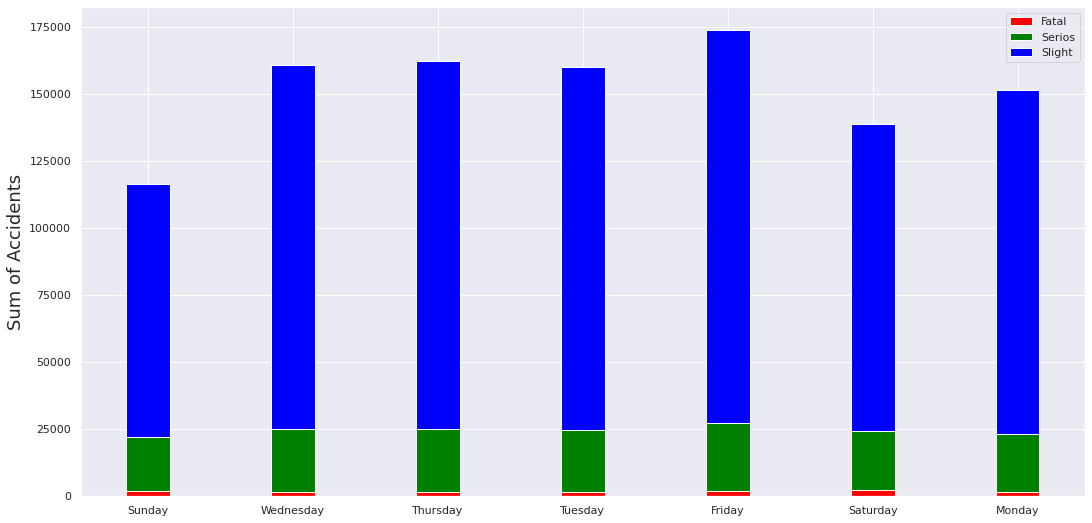

In [ ]:
Severity('Day_of_Week')

**Nhận xét**:  Các ngày trong tuần xảy ra nhiều vụ tai nạn hơn so với 2 ngày nghỉ. Điều này có thể được giải thích bởi sau những ngày làm việc vất vả thì *thứ 7* và *chủ nhật* họ thường ở nhà để dành thời gian cho gia đình hoặc nghỉ xả hơi , dẫn đến lượng người tham gia giao thông không nhiều như các ngày khác => ít xảy ra các vụ tai nạn   

#### **Ở đây chúng ta đặt ra câu hỏi , liệu tai nạn thường xảy ra vào những thời điểm nào trong ngày?**

Để trả lời cho câu hỏi này mình sẽ chia các khung thời gian trong ngày thành 7 khoảng :
- Early morning : Từ 4-6h
- Morning : Từ 6-9h
- Late morning : Từ 10-12h
- Afternoon : Từ 12-16h
- Late Afternoon : Từ 16-19h
- Night : Từ 19-24h
- Midnight : Từ 0h-4h

Và sử dụng biểu đồ tròn để trả lời câu hỏi này 

In [ ]:
def draw_pie(Name):
    df1 = df.groupby('Day_of_Week')
    Time = ['Afternoon','Early morning ','Late Afternoon','Late Morning','Midnight','Morning','Night']
    df2 = df1.get_group(Name)
    num = df2.shape[0]
    per = df2.Time.value_counts().sort_index().values/num
    for i in range(0,len(per)):
        per[i] = round(per[i],2)
    plt.pie(per,labels=Time,shadow=True,startangle=45,autopct='%1.1f%%')
    plt.title(Name,size = 18)
    plt.show()

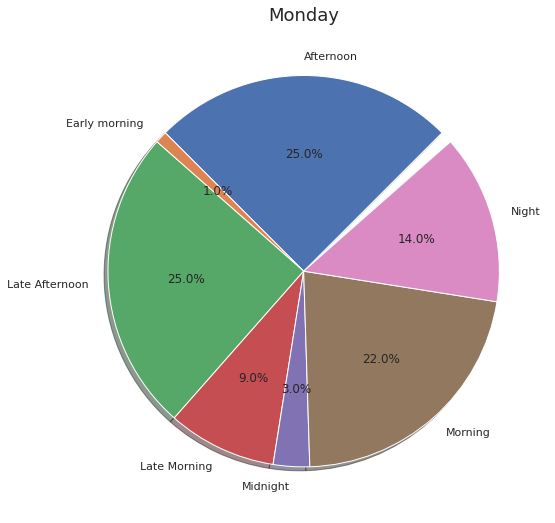

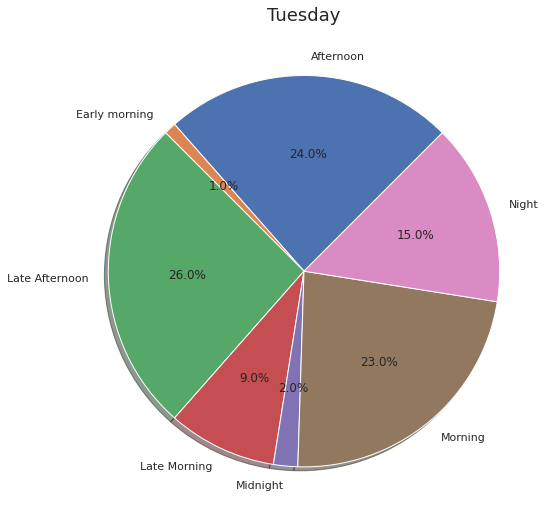

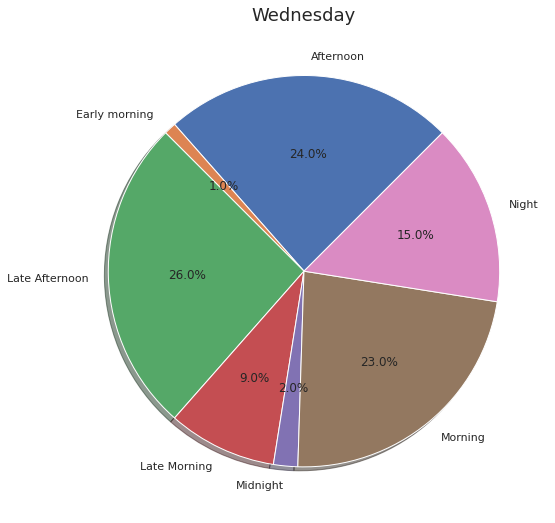

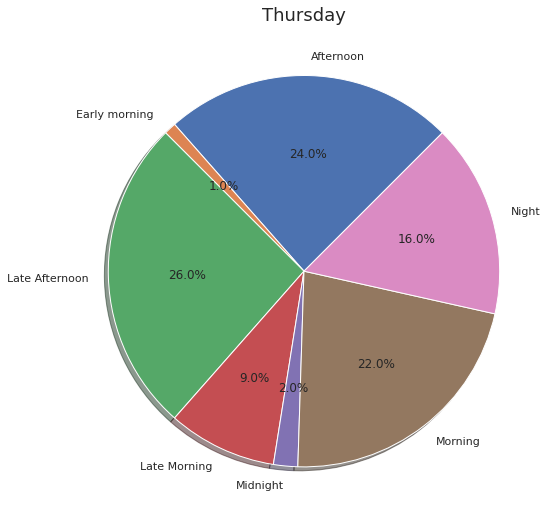

In [ ]:
draw_pie('Monday')
draw_pie('Tuesday')
draw_pie('Wednesday')
draw_pie('Thursday')

**Nhận xét:** Những vụ tai nạn chủ yêu tập trung vào *buổi sáng* , *chiều* hoặc *chiều muộn* . Vì đây là các ngày trong tuần nên vào những thời điểm này thì lượng người tham gia giao thông cao hơn những thời điểm khác. Đặc biệt là vào thời điểm chiều muộn (5-7h) khi đây là khoảng thời gian tan ca của mọi người  

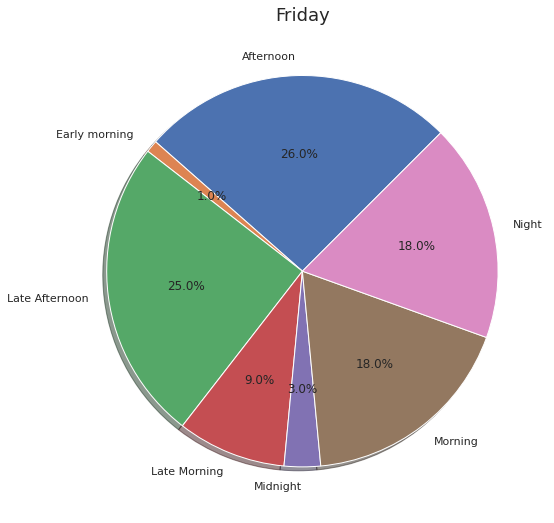

In [ ]:
draw_pie('Friday')

**Nhận xét:** Có thể vào buổi tối (Night) vào ngày thứ 6 tỉ lệ tai nạn cao hơn những ngày trước vì ngày tiếp theo là ngày nghỉ nên có thể tối đó lượng người ra đường đi chơi đông hơn những ngày trước 

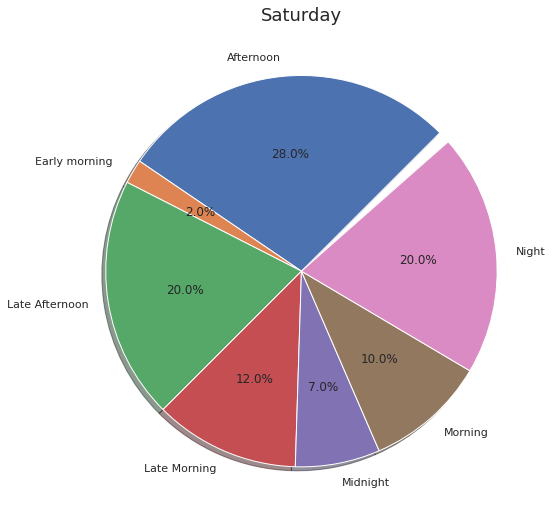

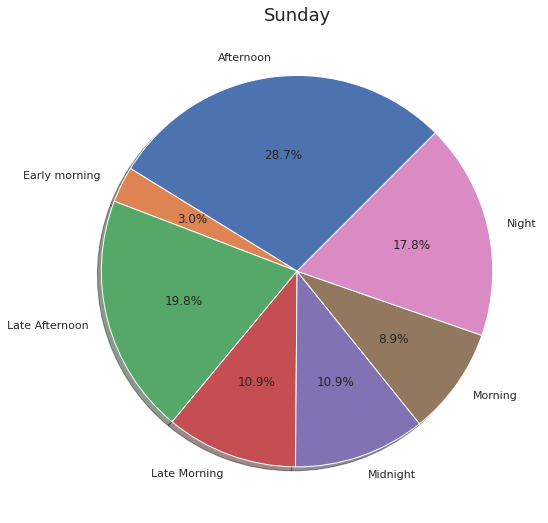

In [ ]:
draw_pie('Saturday')
draw_pie('Sunday')

**Nhận xét:** Có thể thấy vào 2 ngày cuối tuần *Morning* xảy ra ít vụ tai nạn hơn hẳn (22-23% -> 8%-10%) . Trong khi đó những thời điểm khác thì tỉ lệ cao hơn những ngày bình thường 

#### **1.2 1st Road class**

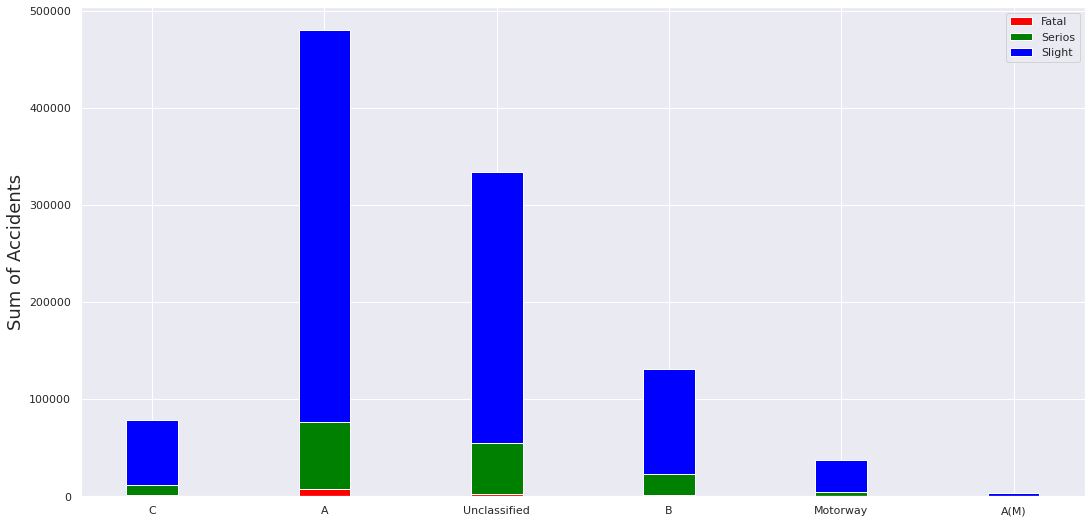

In [ ]:
Severity('1st_Road_Class')

**Nhận xét:** Có thể thấy hầu hết các vụ tai nạn xảy ra đều có 1st_road_class là *A* trong khi thấp nhất là *A(M)*

#### **1.3 Road_Type**

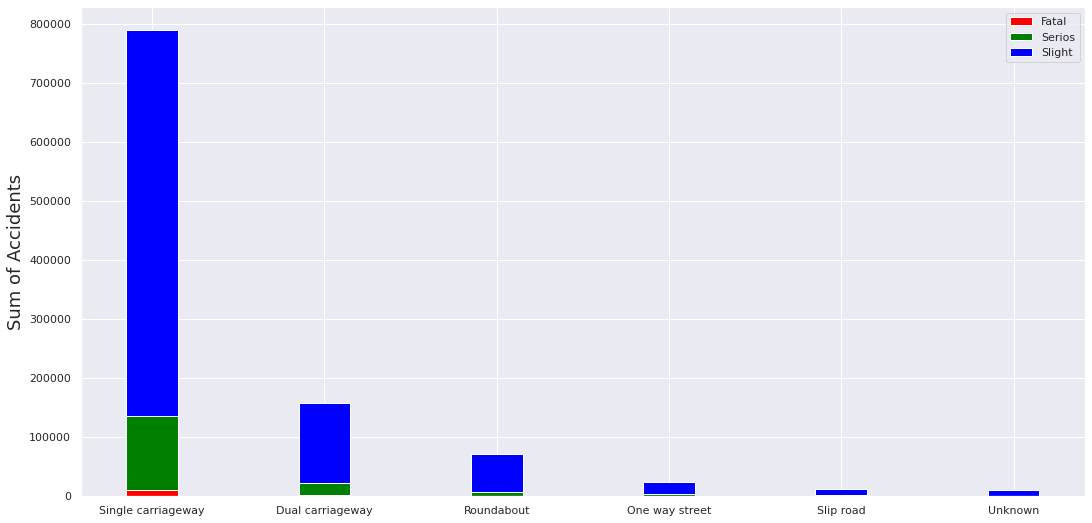

In [ ]:
Severity('Road_Type')

**Nhận xét:** Chủ yếu các vụ tai nạn xảy ra Road Type đều là là *Single carriageway* trong khi thấp nhất là *sliproad* và *one way street*

#### **1.4 Junction_Detail**


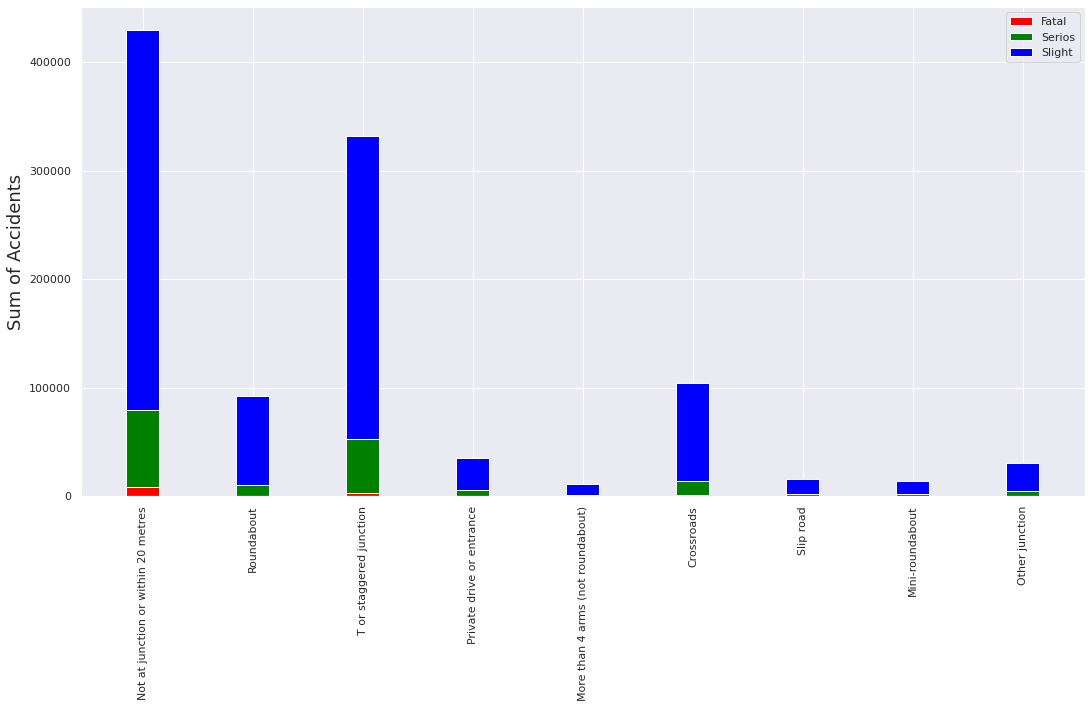

In [ ]:
Severity('Junction_Detail', True)

**Nhận xét:** *Not at junction or within 20 metres* chiếm tỉ lệ lớn nhất



#### **1.5 Light_Conditions**

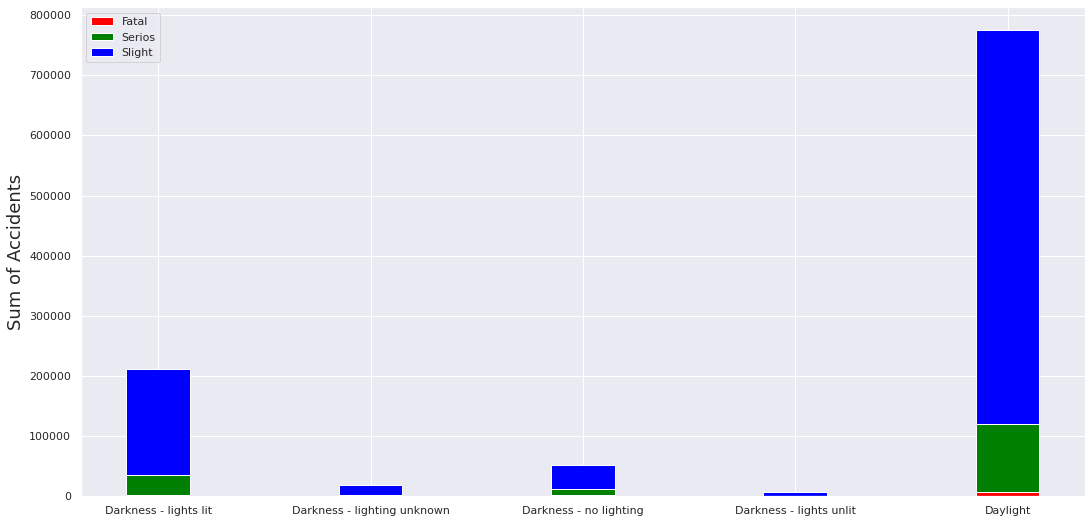

In [ ]:
Severity('Light_Conditions')

**Nhận xét:** *Daylight* là condition xảy ra nhiều vụ tai nạn nhất, cũng dễ hiểu vì lúc này trời chỉ tờ mờ sáng mọi thứ chưa rõ ràng cộng với việc mệt mỏi sau đêm dài lái xe của tài xế dẫn đến việc không thể tập trung 100% vào việc điều khiển phương tiện



#### **1.7 Weather_Conditions**

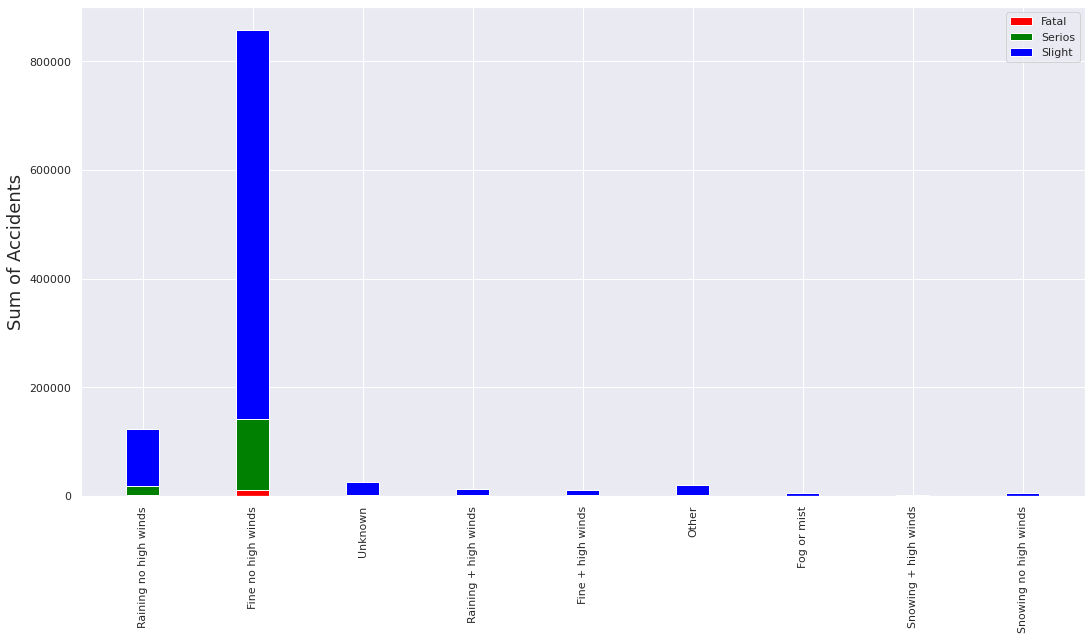

In [ ]:
Severity('Weather_Conditions', True)

**Nhận xét:** *Fine no high winds* là conditions xuất hiện nhiều nhất trong tập dataset. Từ đó có thể thấy là ít nhất ở trong tập dataset này điều kiện thời tiết không ảnh hưởng quá nhiều tới việc xảy ra tai nạn

#### **1.8 Road_Surface_Conditions**

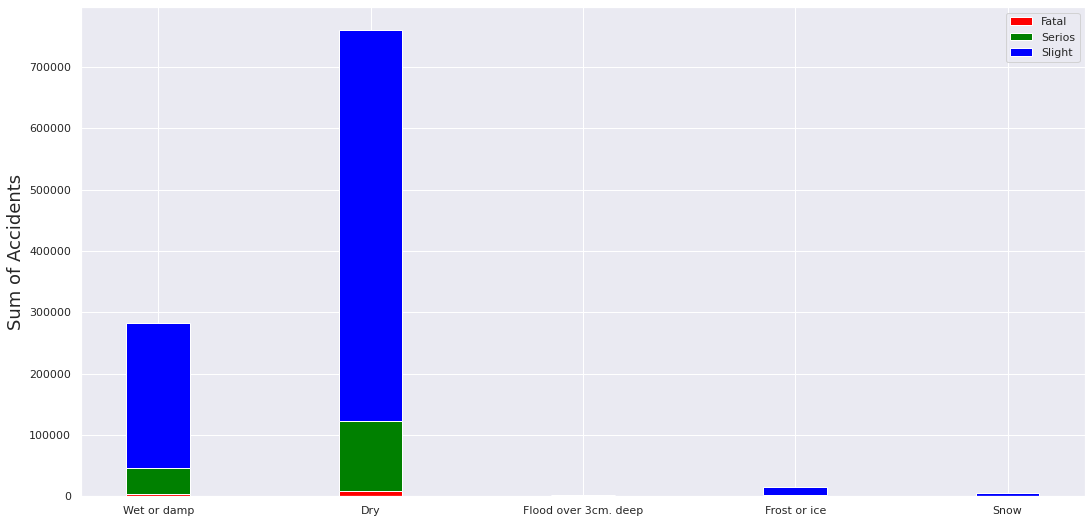

In [ ]:
Severity('Road_Surface_Conditions')

**Nhận xét:** *Dry* là condition gây ra nhiều vụ tai nạn nhất 

#### **1.9 Urban_or_Rural_Area**

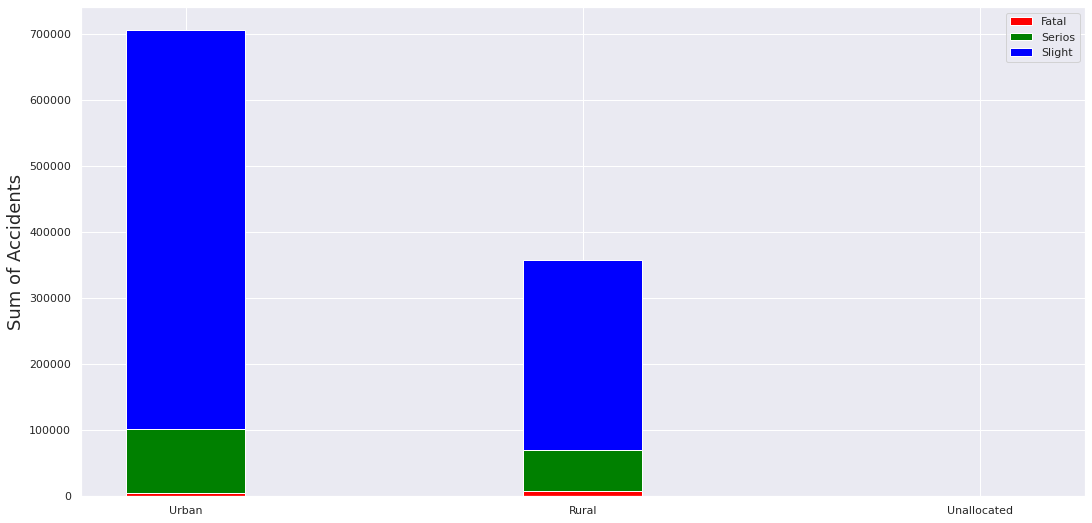

In [ ]:
Severity('Urban_or_Rural_Area')

**Nhận xét:** Khu vực *Urban* - thành thị, có tổng số vụ tai nạn xảy ra, và số vụ tai nạn ở mức độ serious, slight nhiều hơn *Rural* - nông thôn. Ta thấy phần đa sự chênh lệch tổng vụ tai nạn ở hai vùng đến từ mức độ slight, vì thậm chí số vụ tai nạn chết người ở *Rural* lại nhiều hơn, điều này có thể là do điều kiện y tế ở đây còn hạn chế nên khi tai nạn không xử lý được kịp thời. Ta sẽ thử phân tích kỹ hơn bằng toán thống kê ở insight 7.


### **2. Khu vực nào xảy ra tai nạn giao thông thường xuyên nhất?**

#### **2.1 Hàm vẽ biểu đồ**

##### Biểu đồ cột

In [ ]:
def draw_bar (data_frame, renderTo, title_name, typeData = 'default', header_tooltip = 'header'):
  data_frame_visualization = serialize(data_frame, render_to=renderTo, output_type="dict")
  data_frame_visualization["title"] = {"text" : {title_name}}
  data_frame_visualization["subtitle"] = {"text": "Từ năm 2012 đến năm 2019"}
  data_frame_visualization["chart"]["type"] = "column"
  data_frame_visualization["xAxis"]["type"] = "category"

  if (typeData == 'default'):
    data_frame_visualization["plotOptions"] = {"series": {"borderWidth": 0,"dataLabels": {"enabled": "true"}}}
    data_frame_visualization["tooltip"] = {
        "headerFormat": '<span style="font-size:11px"><b>{header}</b></span><br>'.format(header=header_tooltip), 
        "pointFormat": '<span style="color:{point.color}">{point.name}</span>: <b>{point.y}</b><br/>'}
  else:
    if (typeData == 'rate'):
      data_frame_visualization["plotOptions"] = {"series": 
                                                 {"borderWidth": 0,"dataLabels": 
                                                  {"enabled": "true", "format": '{point.y:.2f}%'}}}
      data_frame_visualization["tooltip"] = {
          "headerFormat": '<span style="font-size:11px"><b>{header}</b></span><br>'.format(header=header_tooltip),
          "pointFormat": '<span style="color:{point.color}">{point.name}</span>: <b>{point.y:.2f}%</b> of total<br/>'}
    else:
      data_frame_visualization["plotOptions"] = {"series": 
                                                 {"borderWidth": 0,"dataLabels": 
                                                  {"enabled": "true", "format": '{point.y:.2f}'}}}
      data_frame_visualization["tooltip"] = {
        "headerFormat": '<span style="font-size:11px"><b>{header}</b></span><br>'.format(header=header_tooltip), 
        "pointFormat": '<span style="color:{point.color}">{point.name}</span>: <b>{point.y:.2f}</b><br/>'}

  json_data_frame= "new Highcharts.Chart(%s);" % json_encode(data_frame_visualization)

  display(HTML(
    """<div id="{chart_id}"</div>
    <script src="//code.highcharts.com/stock/highstock.js"></script><script src="//code.highcharts.com/highcharts-more.js"></script>
    <script src="//code.highcharts.com/modules/exporting.js"></script><script type="text/javascript">{data}</script>        
    """.format(chart_id=renderTo, data=json_data_frame)))

##### Biểu đồ tròn

In [ ]:
def draw_pie_highchart (data_frame, renderTo, title_name, header_tooltip = 'header'):
  data_frame_visualization = serialize(data_frame, render_to=renderTo, output_type="dict")
  data_frame_visualization["title"] = {"text" : {title_name}}
  data_frame_visualization["subtitle"] = {"text": "Từ năm 2012 đến năm 2019"}
  data_frame_visualization["chart"]["type"] = "pie"

  data_frame_visualization["plotOptions"] = {"pie": 
                                             {"allowPointSelect": "true",
                                              'cursor': 'pointer', 
                                              'dataLabels': 
                                              {"enabled": "true", 
                                               "format": '<b>{point.name}</b><br>{point.percentage:.1f} %',
                                                "connectorColor": 'silver'}}}
  data_frame_visualization["tooltip"] = {
        "headerFormat": '<span style="font-size:11px"><b>{header}</b></span><br>'.format(header=header_tooltip), 
        "pointFormat": '{series.name}: <b>{point.percentage:.1f}%</b>'}

  data_frame_visualization['accessibility'] = {'point': {'valueSuffix': '%'}}
      
  json_data_frame= "new Highcharts.Chart(%s);" % json_encode(data_frame_visualization)

  display(HTML(
    """<div id="{chart_id}"</div>
    <script src="//code.highcharts.com/stock/highstock.js"></script><script src="//code.highcharts.com/highcharts-more.js"></script>
    <script src="//code.highcharts.com/modules/exporting.js"></script><script type="text/javascript">{data}</script>        
    """.format(chart_id=renderTo, data=json_data_frame)))

#### **2.2.A. Tổng số lượng tai nạn theo vùng ở nước Anh (2012 - 2019)**

In [ ]:
data_total_accidents_by_region = items_df_preprocessed.groupby(['region'])['region'].agg(["count"])
data_total_accidents_by_region.rename(columns={'count' : 'number_of_accidents'}, inplace=True)
data_total_accidents_by_region = data_total_accidents_by_region.sort_values(by = ['number_of_accidents'], ascending=True)
data_total_accidents_by_region

,number_of_accidents
region,
North East,37606
Wales,41292
Scotland,63429
East Midlands,79609
South West,85787
West Midlands,91126
Yorkshire and The Humber,95438
East of England,102614
North West,107442


#### **2.2.B. Biểu đồ tổng số lượng tai nạn theo vùng tại Anh (2012 - 2019)**

In [ ]:
draw_bar(data_total_accidents_by_region, 
         renderTo="accidents_region", 
         header_tooltip='Number of Accidents', 
         title_name="Tổng số lượng tai nạn theo vùng tại nước Anh")

**Nhận xét:**

Trong 8 năm 2012 - 2019: 

- London là vùng có tổng số lượng tai nạn cao nhất: 201634 vụ tai nạn, cao gấp 5.361 lần NorthEast: 37606 vụ tai nạn

- Ta cần quan tâm đến 4 khu vực đặc biệt: North East, Wales có số lượng tai nạn thấp và South East, London có số lượng tai nạn rất cao

Ta vẽ biểu đồ RTAs cho các khu vực theo năm để biết thêm sự thay đổi ở [4. Tổng RTAS trên từng khu vực/ Day_of_Week/ Road_Type 2012 - 2019](https://colab.research.google.com/drive/1ynPBKiyKNTXNQ8yNG_jCKp6u3vRsyQK9#scrollTo=pGPXdoN4NttC)

####**2.3.A. Tỉ lệ tai nạn theo vùng tại Anh (2012 -2019)** 

In [ ]:
rate_accidents = (items_df_preprocessed['region'].value_counts()/items_df_preprocessed['region'].count())*100

rate_accidents_data = data_total_accidents_by_region.copy()
rate_accidents_data.rename(columns={'number_of_accidents' : 'rate'}, inplace=True)
rate_accidents_data['rate'] = rate_accidents
rate_accidents_data

,rate
region,
North East,3.490858
Wales,3.833019
Scotland,5.887933
East Midlands,7.389877
South West,7.963363
West Midlands,8.458967
Yorkshire and The Humber,8.859238
East of England,9.525365
North West,9.973535


#### **2.2.B. Biểu đồ tỉ lệ tai nạn theo vùng tại Anh (2012 - 2019)**

In [ ]:
draw_pie_highchart(rate_accidents_data, renderTo='rate_accidents', 
         title_name="Tỉ lệ tai nạn theo vùng tại nước Anh",  
         header_tooltip='Rate of Accidents')

**Nhận xét**:
Trong 8 năm từ 2012 - 2019 ở nước Anh có
*   **London** là khu vực có tỉ lệ tai nạn cao nhất: 18,72%
*   Tiếp theo đó là **South East** có tỉ lệ tai nạn đứng thứ hai của nước anh: 15.90%
*   **North East** và **Wales** là khu vực có tỉ lệ tai nạn thấp nhất: 3.49% và 3.83%




#### **2.3.A. Số lượng tai nạn trung bình theo ngày trên từng khu vực ở Anh**

In [ ]:
data_accidents_in_date = items_df_preprocessed.copy()
data_accidents_in_date['Date'] = data_accidents_in_date['Date'].dt.date

In [ ]:
accidents_in_date_by_region = data_accidents_in_date.groupby(['Date', 'region'])['region'].agg(['count'])
mean_accidents_date = accidents_in_date_by_region.groupby(['region']).mean()
mean_accidents_date.rename(columns={'count':'mean'}, inplace=True)
mean_accidents_date = mean_accidents_date.sort_values(by=['mean'])
mean_accidents_date

,mean
region,
North East,12.874358
Wales,14.136255
Scotland,21.707392
East Midlands,27.244695
South West,29.359001
West Midlands,31.186174
Yorkshire and The Humber,32.661875
East of England,35.117728
North West,36.770021


#### **2.3.B. Biểu đồ số lượng tai nạn trung bình theo ngày tại các vùng ở nước Anh (2012 - 2019)**

In [ ]:
draw_bar(mean_accidents_date, renderTo='mean_accidents_date', 
         title_name="Số lượng tai nạn trung bình trên ngày tại các vùng ở nước Anh", 
         typeData='mean', 
         header_tooltip='Mean Accidents')

**Nhận xét:**

Trong 8 năm 2012 - 2019 ở nước Anh: 

- **London** là vùng có số lượng tai nạn trung bình trên ngày cao nhất: 69.01 vụ tai nạn/ngày, cao gấp 5.362 lần NorthEast: 12.87 vụ tai nạn/ngày.

- **North East** và **Wales** là 2 vùng có số lượng tai nạn trung bình trên ngày thấp nhất, lần lượt là: 12.87 và 14.14 vụ tai nạn/ngày.

#### **2.4.A. Tỉ lệ tai nạn trung bình theo ngày tại các vùng ở nước Anh (2012-2019)**

In [ ]:
rate_mean_accidents = mean_accidents_date.copy()
sum_mean = float(rate_mean_accidents.sum())

rate_mean = []

for i in rate_mean_accidents['mean']:
  rate_mean.append(float(i/sum_mean * 100))

rate_mean_accidents.rename(columns={'mean':'rate'}, inplace=True)
rate_mean_accidents['rate'] = rate_mean
rate_mean_accidents

,rate
region,
North East,3.491965
Wales,3.834235
Scotland,5.887786
East Midlands,7.389692
South West,7.963163
West Midlands,8.458755
Yorkshire and The Humber,8.859016
East of England,9.525127
North West,9.973285


####**2.4.B. Biểu đồ tỉ lệ tai nạn trung bình theo ngày tại các vùng ở nước Anh (2012-2019)**

In [ ]:
draw_pie_highchart(rate_mean_accidents, renderTo='rate_accidents_date', 
         title_name="Tỉ lệ số lượng tai nạn trung bình trên ngày tại các vùng ở nước Anh",  
         header_tooltip='Rate Accidents')

**Nhận xét:**

Trong 8 năm 2012 - 2019 ở nước Anh: 

- **London** là vùng có tỉ lệ số lượng tai nạn trung bình trên ngày cao nhất chiếm 18,72%.

- **North East** và **Wales** là 2 vùng có tỉ lệ số lượng tai nạn trung bình trên ngày thấp nhất, lần lượt chiếm 3.49% và 3.83%.

#### **2.5 Kết luận:**

**London** là khu vực ở Anh xảy ra tai nạn giao thông thường xuyên nhất trong giai đoạn từ năm 2012 đến năm 2019 với:
- Tổng số lượng tai nạn là **201634** vụ tai nạn, chiếm **18.72%** số vụ tai nạn trong cả nước Anh
- Số lượng tai nạn trung bình theo ngày là **69.01** vụ tai nạn trên một ngày chiếm **18.72%**

### **3. Sự Thay Đổi Của Number_of_Casualties Theo Thời Gian**

In [ ]:
df_8 = pd.DataFrame({'Number_of_Casualties': []})
df_8['Date'] = items_df_preprocessed['Date'].copy()
df_8['Date'] = df_8['Date'].dt.date
df_8['Number_of_Casualties'] = items_df_preprocessed['Number_of_Casualties'].copy()
df_8_date = df_8.groupby('Date').agg(sum).copy()
# df_8 = df_8.set_index('Date')
load_highcharts()
display_charts(df_8_date, title="Sự thay đổi của Number_of_Casualties theo từng ngày 2012 - 2019", chart_type='stock')


In [ ]:
df_8 = pd.DataFrame({'Number_of_Casualties': []})
df_8['Month'] = items_df_preprocessed['Month'].copy()
df_8['Number_of_Casualties'] = items_df_preprocessed['Number_of_Casualties'].copy()
df_8_month = df_8.groupby('Month').agg(sum).copy()
load_highcharts()
display_charts(df_8_month, title="Sự thay đổi của Number_of_Casualties theo từng tháng 2012 - 2019", chart_type='stock')

**Nhận xét:**
- Số thương vong trong 1 ngày dao động từ 200 đến hơn 700.
- Số thương vong trong 1 tháng dao động từ hơn 11000 đến hơn 17000.

- Biểu đồ cho thấy tháng 2 có số lượng thương vong thấp hơn so với các tháng còn lại.
  - Các yếu tố có thể ảnh hưởng:
    - Tháng 2 có số ngày ít nhất.
    - Lúc này đang là cuối mùa đông nên người dân ít ra ngoài.

- Bắt đầu tháng 3 đến tháng 7 số lượng thương vong tăng dần, cao nhất chủ yếu là tháng 7.
  - Các yếu tố có thể ảnh hưởng:
    - Đây là mùa xuân và mùa hè, nhiệt độ lý tưởng để ra ngoài hoạt động, du lịch.
- Từ tháng 8 đến tháng 11 số thương vọng có giảm so với trước nhưng không nhiều và sau đó lại tăng.
  - Các yếu tố có thể ảnh hưởng:
    - Mùa thu ở khu vực nước Anh vẫn chưa lạnh.
    - Có nhiều ngày lễ kéo dài ở thời gian này
- Từ cuối tháng 11 đến cuối tháng 12 giảm khá tốt, và đầu tháng 1 lại tăng.
  - Các yếu tố có thể ảnh hưởng:
    - Nhiệt độ cuối tháng 11 giảm mạnh, có thể có tuyết rơi kéo dài.
    - Cuối tháng 12 là lễ giáng sinh và chuẩn bị đón năm mới.

- Theo thời gian số lượng thương vọng giảm dần.
  - Các yếu tố có thể ảnh hưởng:
    - Tiến bộ về công nghệ.
    - Ý thức người dân được nâng cao.


### **4. Tổng RTAS trên từng khu vực/ Day_of_Week/ Accident_Severity 2012 - 2019**




In [ ]:
def draw_9(feature, timeType = 'Year', customValue = None, fig_size = (1000,700)):
    if (timeType != 'Year' and timeType != 'Month'):
        print('Wrong type!')
    else:
        df_9 = pd.DataFrame({f'{feature}': []})
        df_9[timeType] = items_df_preprocessed[timeType].copy()

        df_9[feature] = items_df_preprocessed[feature].copy()
        df_9['RTA'] = np.nan
        df_9['RTA'] = df_9['RTA'].fillna(1)
        df_9_sum = df_9.groupby([feature,timeType])['RTA'].agg(sum)

        df_9_sum = df_9_sum.reset_index()
        df_9_sum[timeType] = df_9_sum[timeType].astype(str)

        df_9_final = pd.DataFrame({})
        date_9 = df_9.drop_duplicates(timeType,ignore_index=True)[timeType]
        if timeType == 'Month':
            date_9 = date_9.dt.date
        df_9_final[timeType] = date_9.copy()
        value = df_9_sum[feature].unique()
        for v in value:
            df_9_final[f'{v}'] = np.nan

        df_9_final[timeType] = date_9.copy()
        df_9_final = df_9_final.set_index(timeType)

        def fill_value(row):
            df_9_sum[timeType] = df_9_sum[timeType].astype(str)
            return np.array(df_9_sum['RTA'][df_9_sum[timeType] == str(row.name)])

        df_9_final = df_9_final.apply(fill_value, axis = 1, result_type = 'broadcast')

        if (timeType == 'Year'):
            df_9_final.index = pd.to_datetime(df_9_final.index, format = '%Y')
        load_highcharts()
        if customValue == None:
            if (timeType == 'Month'):
                display_charts(df_9_final, title=f"Sự thay đổi của RTAs trên từng {feature} theo tháng 2012 - 2019", chart_type='stock', figsize = fig_size)
            else:
                display_charts(df_9_final, title=f"Sự thay đổi của RTAs trên từng {feature} theo năm 2012 - 2019", chart_type='stock', figsize = fig_size)
        else:
            if (timeType == 'Month'):
                display_charts(df_9_final[customValue], title=f"Sự thay đổi của RTAs trên từng {feature} theo tháng 2012 - 2019", chart_type='stock', figsize = fig_size)
            else:
                display_charts(df_9_final[customValue], title=f"Sự thay đổi của RTAs trên từng {feature} theo năm 2012 - 2019", chart_type='stock', figsize = fig_size)

RTAs: Road Traffic Accidents

#### **a. Tổng RTAS trên từng khu vực 2012 - 2019**

In [ ]:
draw_9('region','Month',None)

In [ ]:
draw_9('region','Year',None)

**Nhận xét:**
- Có 3 nhóm vùng: 
 - Nhóm thứ nhất gồm London và South East có số lượng tai nạn cao, biên độ dao động giữa các năm lớn. 
 - Nhóm thứ 2 gồm North East, Wales có số lượng tai nạn thấp, biên độ dao động nhỏ, 2 vùng này có sự thay đổi gần giống nhau và đang có xu hướng giảm. 
 - Nhóm thứ 3 là các vùng còn lại, có số lượng tai nạn trung bình, giao động không lớn. Riêng `Scotland` trong nhóm này đang có xu hướng giảm mạnh tiến về nhóm 2.
- Có sự giảm mạnh số lượng các vụ tai nạn đường bộ ở tất cả các vùng vào năm 2013, cụ thể là vào tháng 12 năm 2012 và các tháng đầu năm 2013.

- 3 vùng có xu hướng giảm mạnh, khác với các vùng còn lại có dao động trong vòng 8 năm không lớn:

  - North West: Giảm từ `15436` ở 2012 xuống `11473` ở 2019, tổng giảm 3963 tổng vụ tai nạn trên năm.
  - South East: Giảm từ `22812` ở 2012 xuống `18372` ở 2019, tổng giảm 4440 tổng vụ tai nạn trên năm.
  - Scotland: Giảm từ `9668` ở 2012 xuống `5683` ở 2019, tổng giảm 3985 tổng vụ tai nạn trên năm.
  - Ta nên xem xét cụ thể ba vùng South East, North West, Scotland để xem lí do có sự giảm RTAS, liệu có thể áp dụng cho các vùng khác hay không.

#### **b. Tổng RTAS trên từng ngày trong tuần 2012 - 2019**

In [ ]:
draw_9('Day_of_Week','Year',None)

Nhận xét:
Nếu tính theo năm, ta thấy có 4 nhóm các ngày trong tuần: 

- Thứ 6: Luôn có số vụ tai nạn cao hơn các ngày còn lại
- Thứ 3, thứ 4, thứ 5: Có số vụ tai nạn chỉ thua thứ 6, không có sự phân biệt rõ ràng về số vụ tai nạn giữa 3 ngày này.
- Thứ 2, thứ 7: Có số vụ tai nạn luôn thấp hơn nhóm trên là thứ 3, thứ 4, thứ 5. Số vụ tai nạn ở thứ 2 luôn cao hơn thứ 7 ở các năm.
- Chủ nhật: Luôn có số vụ tai nạn thấp hơn các ngày còn lại

Xu hướng chung là số vụ tai nạn giảm ở tất cả các ngày trong tuần. 

#### **c. Tổng RTAS với từng loại tai nạn 2012 - 2019**

In [ ]:
draw_9('Accident_Severity','Month',None, fig_size = (900,500))

In [ ]:
draw_9('Accident_Severity','Year', fig_size = (900,500))

**Nhận xét**:
  - Chủ yếu các vụ tai nạn là tai nạn nhẹ, tai nạn gây chết người rất ít
  - số lượng tai nạn đang có xu hướng giảm nhờ sự giảm mạnh của số lượng tai nạn nhẹ từ năm 2014: `123998` ở năm 2014 và liên tục giảm xuống còn `92403` ở năm 2019, giảm đến `31595` vụ tai nạn trên năm. Số lượng tai nạn nguy hiểm tăng nhẹ từ `20898` ở 2012 lên `23413` ở 2019, tăng `2515` vụ tai nạn trên năm. Số lượng tai nạn chết người gần như không đổi ở mỗi năm (`1637` ở 2012 và `1657` ở 2019)
  - Tháng 11 luôn là đỉnh điểm xảy ra các vụ tai nạn trong năm. Ta xem xét kĩ hơn ở insight 5

### **5. Xem xu hướng và dự đoán số vụ tai nạn**

Trước hết, ta tạo dataframe chứa số lượng tai nạn giao thông đường bộ (RTAs) theo từng ngày và theo từng tháng.

In [ ]:
RTAs_by_month = items_df_preprocessed.copy()
RTAs_by_month['RTAs'] = np.nan
RTAs_by_month['RTAs'] = RTAs_by_month['RTAs'].fillna(1)
RTAs_by_month = RTAs_by_month.groupby('Month')['RTAs'].agg(sum).reset_index()
RTAs_by_month.head(3)
RTAs_by_month.to_csv('RTAs_by_month.csv', index = False)

In [ ]:
RTAs_by_date = items_df_preprocessed.copy()
RTAs_by_date['RTAs'] = np.nan
RTAs_by_date['RTAs'] = RTAs_by_date['RTAs'].fillna(1)
RTAs_by_date['Date'] = RTAs_by_date['Date'].dt.date
RTAs_by_date = RTAs_by_date.groupby('Date')['RTAs'].agg(sum).reset_index()
RTAs_by_date.head(3)
# RTAs_by_date.to_csv('RTAs_by_date.csv', index = False)

,Date,RTAs
0,2012-01-01,249.0
1,2012-01-02,424.0
2,2012-01-03,439.0


Với dataframe RTAs cho từng ngày, sử dụng tableau ta có các trend line và dự đoán sau:

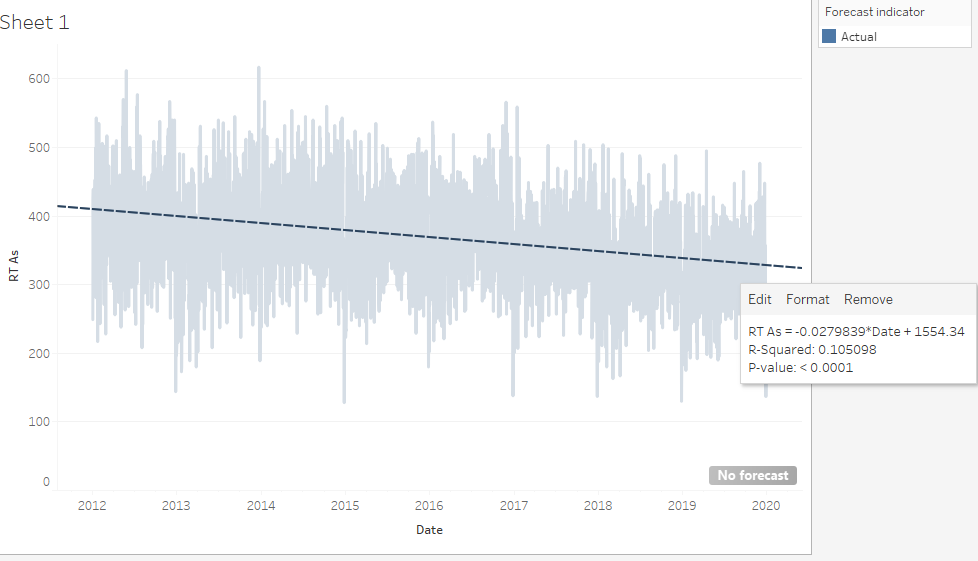

Ta thấy R-squared của trend line bé, mô hình không thể hiện được giá trị của RTAs theo ngày nhưng với p-value rất bé: P-value < 0.0001, mô hình vẫn thể hiện được xu hướng của số vụ tai nạn theo ngày, đó là đang giảm.

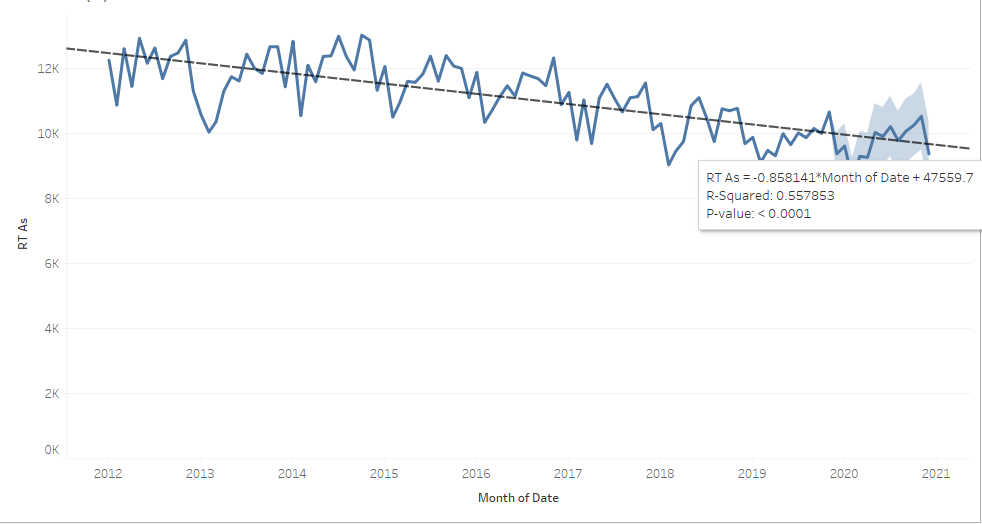

R-squared = 0.557853, mô hình giải thích được 55.7853% sự thay đổi của RTAs theo tháng.

Ta cũng có đường dự đoán tai nạn như sau:

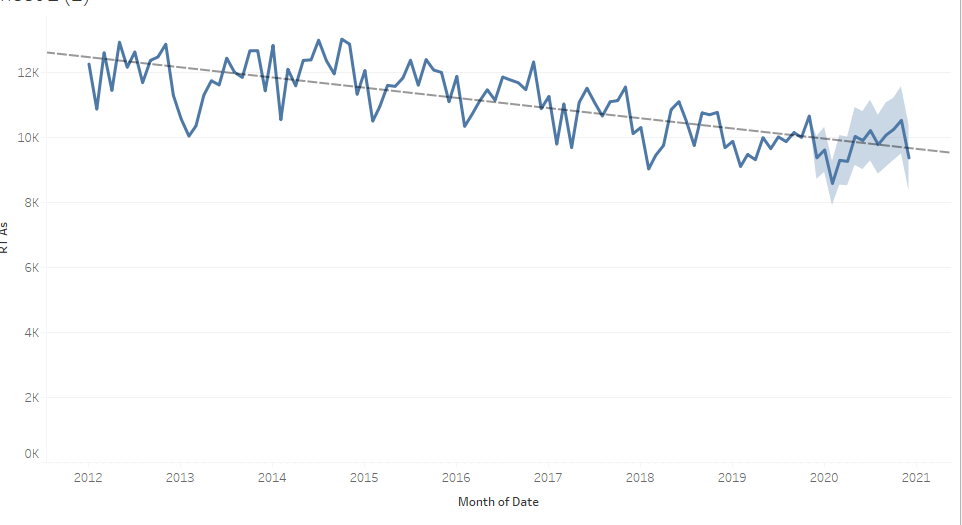

Ngoài các nhận xét ở insight 4c, ta thấy RTAs có tính chu kỳ: tháng 2 luôn có số vụ tai nạn thấp trong năm, sau đó RTAs thường tăng dần đến tháng 11, có sự giảm nhẹ ở tháng 8, và giảm dần đến tháng 2 năm sau.

### **6.  Vùng miền có ảnh hưởng đến loại tai nạn?**

${H_0}$: Vùng miền và loại tai nạn độc lập nhau

${H_A}$: Vùng miền và loại tai nạn phụ thuộc nhau

</br>

Đặt:

${A =}$  Region, ${A_1 =}$ `East Midlands`, ${A_2}$ = `East of England`, ${A_3 =}$ `London`, ${A_4 =}$ `North East`, ${A_5 =}$ `North West`, ${A_6 =}$  `Scotland`, ${A_7 =}$  `South East`, ${A_8 =}$ `South West`, ${A_9 =}$ `Wales`, ${A_{10} =}$ `West Midlands`, ${A_{11}}$ =  `Yorkshire and the Humber`

${B =}$ Accident severity, ${B_1 =}$ Fatal, ${B_2 =}$ Serious, ${B_3 =}$ Slight

</br>

Ta có:

${H_0}$: ${P(A_i\cap B_j) = P(A_i)P(B_j)}$

${H_A}$: ${P(A_i\cap B_j) \neq P(A_i)P(B_j)}$

</br>

Phần dưới sẽ trình bày về mặt toán học lẫn sử dụng thư viện scipy.stats để tính toán

</br>

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


</br>

Trước tiên, ta lập bảng contingency

</br>

In [ ]:
contigency= pd.crosstab(items_df_preprocessed['region'], items_df_preprocessed['Accident_Severity']) 
contigency.columns = ['Fatal', 'Serious', 'Slight']
contigency

,Fatal,Serious,Slight
region,,,
East Midlands,1331,12858,65420
East of England,1406,17678,83530
London,995,22180,178459
North East,487,6167,30952
North West,1362,19261,86819
Scotland,1266,11916,50247
South East,1842,30183,139269
South West,1351,13965,70471
Wales,760,7226,33306


In [ ]:
contigency['Pr(Ai)'] = contigency['Fatal'] + contigency['Serious'] + contigency['Slight']
sum_accidents = sum(contigency['Pr(Ai)'])
contigency['Pr(Ai)'] = contigency['Pr(Ai)']/sum_accidents
contigency

,Fatal,Serious,Slight,Pr(Ai)
region,,,,
East Midlands,1331,12858,65420,0.073899
East of England,1406,17678,83530,0.095254
London,995,22180,178459,0.187171
North East,487,6167,30952,0.034909
North West,1362,19261,86819,0.099735
Scotland,1266,11916,50247,0.058879
South East,1842,30183,139269,0.159007
South West,1351,13965,70471,0.079634
Wales,760,7226,33306,0.038330


In [ ]:
Pr_Slight = sum(contigency['Slight'])/sum_accidents
Pr_Serious = sum(contigency['Serious'])/sum_accidents
Pr_Fatal = sum(contigency['Fatal'])/sum_accidents
PrBj = [Pr_Fatal,Pr_Serious,Pr_Slight]
print(f'Pr_Fatal = {Pr_Fatal}\nPr_Serious = {Pr_Serious}\nPr_Slight = {Pr_Slight}')
print(Pr_Slight + Pr_Serious + Pr_Fatal)

Pr_Fatal = 0.01226710827637614
Pr_Serious = 0.15971839954848874
Pr_Slight = 0.8280144921751351
1.0


Ta đã tính được ${Pr(A_i)}$ như bảng trên và 

${Pr(B_1)}$ = 0.01226710827637614

${Pr(B_2)}$ = 0.15971839954848874

${Pr(B_3)}$ = 0.8280144921751351

---

Đến đây ta có thể tính:

Giá trị mong đợi ${E}$:

\begin{equation}
\text{Do ta kỳ vọng A và B độc lập:}\\
E_{ij} = Pr(A_i) \times Pr(B_j) \times N [2]\\
\text{hay}\\
E_{ij} = \frac{\text{(Tổng dòng} \times \text{Tổng cột)}}{\text{Tổng bảng}} [3]   \\ 
\text{với bảng là bảng contingency}
\end{equation}

Giá trị ${\chi^2}$:

\begin{equation}
\chi^2=\Sigma\frac{(O-E)^2}{E} [2][3]\\
\text{với O là giá trị thực sự và E là giá trị mong đợi}
\end{equation}

Giá trị dof: Degree of freedom

dof cho ${\chi^2}$ độc lập:

\begin{equation}
dof = v = rc - 1 - (r-1) - (c-1) = (r-1)(c-1) [2]\\ = 20
\end{equation}

Chọn mức ý nghĩa:

\begin{equation}
\alpha = 0.05
\end{equation}

Tra bảng Chi Squared với ${\alpha = 0.05, dof = 20}$ ta được critical value ${ = 31.41043}$	

Chấp nhận ${H_0}$ nếu 
\begin{equation}
\chi^2_v <= 31.41043
\end{equation}

</br>

Ta có thể sử dụng `chi2_contingency` của thư viện spicy để tính toán:


In [ ]:
# [3]Source:  https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95
chi, pval, dof, expected = chi2_contingency(contigency.drop(['Pr(Ai)'],1))
print('p-value là: ', pval)
significance = 0.05
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi = %.6f, critical value = %.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""Với mức ý nghĩa %.2f, ta bác bỏ Ho và chấp nhận HA. 
Kết luận: Vùng miền và loại tai nạn không độc lập.""" % (significance))
else:
    print("""Với mức ý nghĩa %.2f, ta bác bỏ Ho và chấp nhận Ho. 
Kết luận: Vùng miền và loại tai nạn độc lập.""" % (significance))

Ta kiểm tra, không dùng thư viện:

</br>

In [ ]:
append_data = []
for region in contigency.index:
  append_data.append(items_df_preprocessed['Accident_Severity'][items_df_preprocessed['region'] == f'{region}'].value_counts().rename_axis('Accident_Severity').reset_index(name='Accidents'))
# items_df['Accidents'].value_counts().rename_axis('Accidents').reset_index(name='Frequency')
contigency_1 = pd.concat(append_data)
contigency_1.reset_index(inplace = True)
contigency_1 = contigency_1.drop(['index'], 1)
contigency_1

contigency_1['region'] = np.nan
i = 0
pd.options.mode.chained_assignment = None  # default='warn'

for region in contigency.index:
  contigency_1['region'][i] = f'{region}'
  contigency_1['region'][i+1] = f'{region}'
  contigency_1['region'][i+2] = f'{region}'
  i = i + 3

contigency_1 = contigency_1.reindex(columns = ['region', 'Accident_Severity', 'Accidents'])
contigency_1.head()

In [ ]:
g = sns.catplot(
    data=contigency_1, kind="bar",
    x = 'region', y = 'Accidents', hue ='Accident_Severity',
    ci="sd", palette="dark", alpha=.6, height=6.6, aspect = 3
)
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Phân bố loại tai nạn trên các vùng tại Anh tính từ 2012-2019')
plt.show()

In [ ]:
expectedValue = []
PrBj = [Pr_Slight, Pr_Serious, Pr_Fatal]

for Ai in contigency['Pr(Ai)']: 
  for Bj in PrBj:
      expectedValue.append(Ai*Bj*sum_accidents)

chiij = []
oij = np.array(contigency_1['Accidents'])

for ij in range(0, len(expectedValue)):
  chiij.append((oij[ij] - expectedValue[ij])**2/expectedValue[ij])

contigency_1['Expected value'] = expectedValue
contigency_1['(O_ij - E_ij)^2/E_ij'] = chiij

chi_square = sum(contigency_1['(O_ij - E_ij)^2/E_ij'])
print('chi_square = ', chi_square)
contigency_1.head()

Ta thấy:

\begin{equation}
\chi^2_v = 7059.647980591137 > 31.41043
\end{equation}

</br>

Vậy bác bỏ ${H_0}$ với mức ý nghĩa 0.05, chấp nhận ${H_A}$ 

</br>

<center><font size ="5"><b>Kết luận: Vùng miền và loại tai nạn có phụ thuộc nhau</font></center>

</br>

### **7. Trung bình giữa 'Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit' giữa nông thôn và thành thị có bằng nhau?**

In [ ]:
numeric_features_selected = ['Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit']


In [ ]:
from statsmodels.stats.weightstats import ztest

significance = 0.05

for i in range(len(numeric_features_selected)):
    
    print(f'\nHo: trung bình `{numeric_features_selected[i]}` ở thành thị = trung bình `{numeric_features_selected[i]}` ở nông thôn\n')
    print(f'\nHa: trung bình `{numeric_features_selected[i]}` ở thành thị khác trung bình `{numeric_features_selected[i]}` ở nông thôn\n')
    stat, p = ztest(items_df_preprocessed[numeric_features_selected[i]][items_df_preprocessed['Urban_or_Rural_Area'] == 'Rural'],items_df_preprocessed[numeric_features_selected[i]][items_df_preprocessed['Urban_or_Rural_Area'] == 'Urban'])
    print('stat=%.3f, p=%.3f' % (stat, p))
    print('\nKẾT LUẬN: ')
    if p >= significance:
      print(f'Với mức ý nghĩa {significance}, ta chấp nhận Ho, bác bỏ Ha.\nTrung bình `{numeric_features_selected[i]}` ở thành thị = trung bình `{numeric_features_selected[i]}` ở nông thôn\n---')
    else:
      print(f'Với mức ý nghĩa {significance}, ta chấp nhận Ha, bác bỏ Ho.\nTrung bình `{numeric_features_selected[i]}` ở thành thị khác trung bình `{numeric_features_selected[i]}` ở nông thôn\n---')


Ho: trung bình `Number_of_Vehicles` ở thành thị = trung bình `Number_of_Vehicles` ở nông thôn


Ha: trung bình `Number_of_Vehicles` ở thành thị khác trung bình `Number_of_Vehicles` ở nông thôn

stat=53.496, p=0.000

KẾT LUẬN: 
Với mức ý nghĩa 0.05, ta chấp nhận Ha, bác bỏ Ho.
Trung bình `Number_of_Vehicles` ở thành thị khác trung bình `Number_of_Vehicles` ở nông thôn
---

Ho: trung bình `Number_of_Casualties` ở thành thị = trung bình `Number_of_Casualties` ở nông thôn


Ha: trung bình `Number_of_Casualties` ở thành thị khác trung bình `Number_of_Casualties` ở nông thôn

stat=129.825, p=0.000

KẾT LUẬN: 
Với mức ý nghĩa 0.05, ta chấp nhận Ha, bác bỏ Ho.
Trung bình `Number_of_Casualties` ở thành thị khác trung bình `Number_of_Casualties` ở nông thôn
---

Ho: trung bình `Speed_limit` ở thành thị = trung bình `Speed_limit` ở nông thôn


Ha: trung bình `Speed_limit` ở thành thị khác trung bình `Speed_limit` ở nông thôn

stat=952.231, p=0.000

KẾT LUẬN: 
Với mức ý nghĩa 0.05, ta chấp nhận H

### **8. Tai nạn bị ảnh hưởng bởi cách thức điều khiển giao lộ?**

#### **Số lượng tai nạn gây ra:**

In [ ]:
#Use a copy of original dataframe
dataframe = items_df_preprocessed.copy()

data_total_accidents_by_Junction_Control = dataframe.groupby(['Junction_Control'])['Junction_Control'].agg(["count"])
data_total_accidents_by_Junction_Control.rename(columns={'count' : 'number_of_accidents'}, inplace=True)
data_total_accidents_by_Junction_Control = data_total_accidents_by_Junction_Control.sort_values(by = ['number_of_accidents'], ascending=True)
data_total_accidents_by_Junction_Control

,number_of_accidents
Junction_Control,
Not at junction or within 20 metres,392
Authorised person,2373
Stop sign,5840
Auto traffic signal,114885
None,443756
Give way or uncontrolled,510025


#### **Biểu đồ tổng số lượng tai nạn do cách thức điều khiển giao lộ:**

In [ ]:
# Hàm vẽ biểu đồ
def draw_bar (data_frame, renderTo, title_name, typeData = 'default', header_tooltip = 'header'):
  data_frame_visualization = serialize(data_frame, render_to=renderTo, output_type="dict")
  data_frame_visualization["title"] = {"text" : {title_name}}
  data_frame_visualization["subtitle"] = {"text": "Từ năm 2012 đến năm 2019"}
  data_frame_visualization["chart"]["type"] = "column"
  data_frame_visualization["xAxis"]["type"] = "category"

  if (typeData == 'default'):
    data_frame_visualization["plotOptions"] = {"series": {"borderWidth": 0,"dataLabels": {"enabled": "true"}}}
    data_frame_visualization["tooltip"] = {
        "headerFormat": '<span style="font-size:11px"><b>{header}</b></span><br>'.format(header=header_tooltip), 
        "pointFormat": '<span style="color:{point.color}">{point.name}</span>: <b>{point.y}</b><br/>'}
  else:
    if (typeData == 'rate'):
      data_frame_visualization["plotOptions"] = {"series": 
                                                 {"borderWidth": 0,"dataLabels": 
                                                  {"enabled": "true", "format": '{point.y:.2f}%'}}}
      data_frame_visualization["tooltip"] = {
          "headerFormat": '<span style="font-size:11px"><b>{header}</b></span><br>'.format(header=header_tooltip),
          "pointFormat": '<span style="color:{point.color}">{point.name}</span>: <b>{point.y:.2f}%</b> of total<br/>'}
    else:
      data_frame_visualization["plotOptions"] = {"series": 
                                                 {"borderWidth": 0,"dataLabels": 
                                                  {"enabled": "true", "format": '{point.y:.2f}'}}}
      data_frame_visualization["tooltip"] = {
        "headerFormat": '<span style="font-size:11px"><b>{header}</b></span><br>'.format(header=header_tooltip), 
        "pointFormat": '<span style="color:{point.color}">{point.name}</span>: <b>{point.y:.2f}</b><br/>'}

  json_data_frame= "new Highcharts.Chart(%s);" % json_encode(data_frame_visualization)

  display(HTML(
    """<div id="{chart_id}"</div>
    <script src="//code.highcharts.com/stock/highstock.js"></script><script src="//code.highcharts.com/highcharts-more.js"></script>
    <script src="//code.highcharts.com/modules/exporting.js"></script><script type="text/javascript">{data}</script>        
    """.format(chart_id=renderTo, data=json_data_frame)))

# Vẽ
draw_bar(data_total_accidents_by_Junction_Control, 
         renderTo="accidents_region", 
         header_tooltip='Number of Accidents', 
         title_name="Tổng số lượng tai nạn theo cách điều khiển giao lộ tại nước Anh")

#### **Tỷ lệ tai nạn gây ra:**

In [ ]:
rate_accidents_Junction_Control = (dataframe['Junction_Control'].value_counts()/dataframe['Junction_Control'].count())*100

rate_accidents_data_Junction_Control = data_total_accidents_by_Junction_Control.copy()
rate_accidents_data_Junction_Control.rename(columns={'number_of_accidents' : 'rate'}, inplace=True)
rate_accidents_data_Junction_Control['rate'] = rate_accidents_Junction_Control
rate_accidents_data_Junction_Control

,rate
Junction_Control,
Not at junction or within 20 metres,0.036388
Authorised person,0.220279
Stop sign,0.542111
Auto traffic signal,10.664447
None,41.192606
Give way or uncontrolled,47.344169


#### **Biểu đồ tỷ lệ tai nạn do cách thức điều khiển giao lộ:**

In [ ]:
draw_pie_highchart(rate_accidents_data_Junction_Control, renderTo='rate_accidents', 
         title_name="Tỷ lệ tai nạn theo cách điều khiển giao lộ tại nước Anh",  
         header_tooltip='Rate of Accidents')

#### **Kết luận**

99.2% các vụ tai nạn do 3 nguyên nhân sau:
1.   Give way or uncontrolled thì chiếm trọng cao nhất (47.3%). Từ đó để giảm thiểu tai nạn người tham gia giao thông phải hết sức tập trung khi tham gia giao thông.
2.   None (Không có phương tiện điều khiển giao lộ) cũng chiếm tỉ trọng cao (41.2%). Từ đó để giảm thiểu tai nạn thì cơ quan chức năng nên đặt phương tiện kiểm soát, điều khiển giao lộ hoặc có phương án phù hợp để mọi người có thể tự do lưu thông mà vẫn an toàn.
3. Ngoài ra thì Auto traffic signal cũng chiếm tỉ trọng cao (10.7%). Từ đó để giảm thiểu tai nạn giao thông thì người tham gia giao thông phải nghiêm túc chấp hành các tín hiệu giao thông.



### **9. Top 10 Day_of_Week, 1st_Road_Class, Speed_limit, Junction_Detail, Urban_or_Rural_Area để xảy ra tổng số vụ tai nạn cao nhất và số vụ chết người cao nhất**

**Bảng Top 10 Day_of_Week, 1st_Road_Class, Speed_limit, Junction_Detail, Urban_or_Rural_Area để xảy ra tổng số vụ tai nạn cao nhất:**

In [ ]:
df_9 = items_df_preprocessed.copy()
df_9['RTAs'] = np.nan
df_9['RTAs'] = df_9['RTAs'].fillna(1)
df_9 = df_9.groupby(['Day_of_Week', '1st_Road_Class', 'Speed_limit', 'Junction_Detail', 'Urban_or_Rural_Area'])['RTAs'].agg(sum).reset_index()
df_9 = df_9.sort_values(by = ['RTAs'], ascending=False)
df_9.head(10)

,Day_of_Week,1st_Road_Class,Speed_limit,Junction_Detail,Urban_or_Rural_Area,RTAs
37,Friday,A,30.0,T or staggered junction,Urban,15929.0
2357,Tuesday,A,30.0,T or staggered junction,Urban,14975.0
2814,Wednesday,A,30.0,T or staggered junction,Urban,14967.0
1898,Thursday,A,30.0,T or staggered junction,Urban,14956.0
402,Friday,Unclassified,30.0,T or staggered junction,Urban,14722.0
391,Friday,Unclassified,30.0,Not at junction or within 20 metres,Urban,14081.0
503,Monday,A,30.0,T or staggered junction,Urban,13728.0
3181,Wednesday,Unclassified,30.0,T or staggered junction,Urban,13702.0
2258,Thursday,Unclassified,30.0,T or staggered junction,Urban,13680.0
2716,Tuesday,Unclassified,30.0,T or staggered junction,Urban,13564.0


**Bảng Top 10 Day_of_Week, 1st_Road_Class, Speed_limit, Junction_Detail, Urban_or_Rural_Area để xảy ra tổng số vụ chết người cao nhất:**

In [ ]:
df_9 = items_df_preprocessed.copy()
df_9 = df_9[df_9['Accident_Severity'] == 'Fatal']
df_9['RTAs'] = np.nan
df_9['RTAs'] = df_9['RTAs'].fillna(1)
df_9 = df_9.groupby(['Day_of_Week', '1st_Road_Class', 'Speed_limit', 'Junction_Detail', 'Urban_or_Rural_Area'])['RTAs'].agg(sum).reset_index()
df_9 = df_9.sort_values(by = ['RTAs'], ascending=False)
df_9.head(10)

,Day_of_Week,1st_Road_Class,Speed_limit,Junction_Detail,Urban_or_Rural_Area,RTAs
529,Sunday,A,60.0,Not at junction or within 20 metres,Rural,379.0
367,Saturday,A,60.0,Not at junction or within 20 metres,Rural,331.0
217,Monday,A,60.0,Not at junction or within 20 metres,Rural,312.0
43,Friday,A,60.0,Not at junction or within 20 metres,Rural,307.0
686,Thursday,A,60.0,Not at junction or within 20 metres,Rural,279.0
996,Wednesday,A,60.0,Not at junction or within 20 metres,Rural,255.0
844,Tuesday,A,60.0,Not at junction or within 20 metres,Rural,234.0
332,Saturday,A,30.0,Not at junction or within 20 metres,Urban,117.0
579,Sunday,B,60.0,Not at junction or within 20 metres,Rural,113.0
412,Saturday,B,60.0,Not at junction or within 20 metres,Rural,112.0


Nhận xét: 

- Khá ngạc nhiên khi các ngày cuối tuần xuấn hiện đến 5/10 trong **bảng top 10 điều kiện để xảy ra tổng số vụ chết người cao nhất** trên, trong khi với các insight phân tích ở trên hai ngày cuối tuần có tổng vụ tai nạn ít nhất.
- Ở cả 2 bảng, road class A đều chiếm nhiều, đặc biệt là bản top điều kiện gây chết người, ta cần xem xét nâng cấp các con đường có class A này.
- 9/10 là T or staggered junction ở bảng top 10 điều kiện xảy ra tổng vụ tai nạn, và 10/10 là Not at junction or within 20 metres	ở bảng top 10 điều kiện xảy ra vụ tai nạn chết người.
- Điều kiện tốc độ xảy ra tai nạn nhiều nhất là 30 (10/10), trong khi xảy ra tai nạn chết người là 60 (9/10). Như vậy cần hạn chế các con đường tốc độ tối đa 60, class A, nhất là ở nông thôn và không có giao lộ.

##**VIII. Nhìn lại quá trình làm đồ án**

**Khó khăn:**

- Dữ liệu lớn nên khó khăn trong việc thời gian xử lý
- Tìm ra con số xác thực để đánh giá các giải pháp giảm thiểu tai nạn giao thông
- Mô hình hồi quy không đủ điều kiện để đánh giá số lượng người bị tai nạn dựa trên các biến còn lại, để giúp tìm cách giảm thiểu người bị tai nạn.

##**IX. Tham khảo**

[1]. Bài tập và bài giảng thầy Trần Trung Kiên, thầy Dương Nguyễn Thái Bảo, khoa CNTT trường Đại Học Khoa Học Tự Nhiên - Đại Học Quốc Gia TP.HCM

[2]. https://www3.nd.edu/~rwilliam/stats1/x51.pdf

[3]. https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95

[4]. https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/structured_data/time_series.ipynb#scrollTo=TX6uGeeeWIkG